In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/sample_submission.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/bureau.csv
/kaggle/input/homecreditdefaultrisk/__results__.html
/kaggle/input/homecreditdefaultrisk/__notebook__.ipynb
/kaggle/input/homecreditdefaultrisk/__output__.json
/kaggle/input/homecreditdefaultrisk/custom.css
/kaggle/input/homecreditdefaultrisk/__results___files/__results___65_0.png
/kaggle/input/homecreditdefaultrisk/__results___files/__results___67_0.png
/kaggle/input/homecreditdef

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
attribute_description = pd.read_csv("/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv", encoding='cp1252')
attribute_description = attribute_description.iloc[:122,2:4]
attribute_description = attribute_description.style.set_properties(**{'text-align': 'left'})
attribute_description

,Row,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)"
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
5,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,CNT_CHILDREN,Number of children the client has
7,AMT_INCOME_TOTAL,Income of the client
8,AMT_CREDIT,Credit amount of the loan
9,AMT_ANNUITY,Loan annuity


In [3]:
app_train = pd.read_csv("/kaggle/input/home-credit-default-risk/application_train.csv")
app_test = pd.read_csv("/kaggle/input/home-credit-default-risk/application_test.csv")
app_train.head(5).T

,0,1,2,3,4
SK_ID_CURR,100002,100003,100004,100006,100007
TARGET,1,0,0,0,0
NAME_CONTRACT_TYPE,Cash loans,Cash loans,Revolving loans,Cash loans,Cash loans
CODE_GENDER,M,F,M,F,M
FLAG_OWN_CAR,N,N,Y,N,N
FLAG_OWN_REALTY,Y,N,Y,Y,Y
CNT_CHILDREN,0,0,0,0,0
AMT_INCOME_TOTAL,202500.0,270000.0,67500.0,135000.0,121500.0
AMT_CREDIT,406597.5,1293502.5,135000.0,312682.5,513000.0
AMT_ANNUITY,24700.5,35698.5,6750.0,29686.5,21865.5


## Info and Describe:

In [4]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

- DAYS_BIRTH is the age in days of the client at the time of the loan in negative days
- OBS_30_CNT_SOCIALCIRCLE, AMT_ANNUITY, DAYS_EMPLOYED have extreme values
- Drop ID column

In [6]:
app_train.drop(['SK_ID_CURR'],axis=1, inplace=True)

In [7]:
app_train['AMT_ANNUITY'].quantile([0.2,0.5,0.75,0.8,0.9,0.99])

0.20    14701.5
0.50    24903.0
0.75    34596.0
0.80    37516.5
0.90    45954.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [8]:
len(app_train[app_train['AMT_ANNUITY']>100000])

505

In [9]:
app_train['OBS_30_CNT_SOCIAL_CIRCLE'].quantile([0.2,0.5,0.75,0.8,0.9,0.99])

0.20     0.0
0.50     0.0
0.75     2.0
0.80     3.0
0.90     4.0
0.99    10.0
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64

In [10]:
len(app_train[app_train['OBS_30_CNT_SOCIAL_CIRCLE']>10])

2782

- Will convert the extreme values in these two features to missing values then impute them

In [11]:
app_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

- TARGET indicating 0: the loan was repaid or 1: the loan was not repaid. it is imbalnaced

## Identify categorical and numerical cols

In [12]:
# Identify categorical and numerical cols:
categorical_cols = app_train.select_dtypes(include='object').columns
numerical_col = app_train.select_dtypes(exclude = 'O').columns

In [13]:
# Number of unique classes in each object column
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [14]:
# Unique values in each object column
for col in categorical_cols:
    print(app_train[col].value_counts())
    print('--------------------------------')

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
--------------------------------
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64
--------------------------------
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64
--------------------------------
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64
--------------------------------
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
--------------------------------
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
--------------

- will use Label Encoding for any categorical variables with only 2 categories and One-Hot Encoding for any categorical variables with more than 2 categories for both train and test data

## EDA

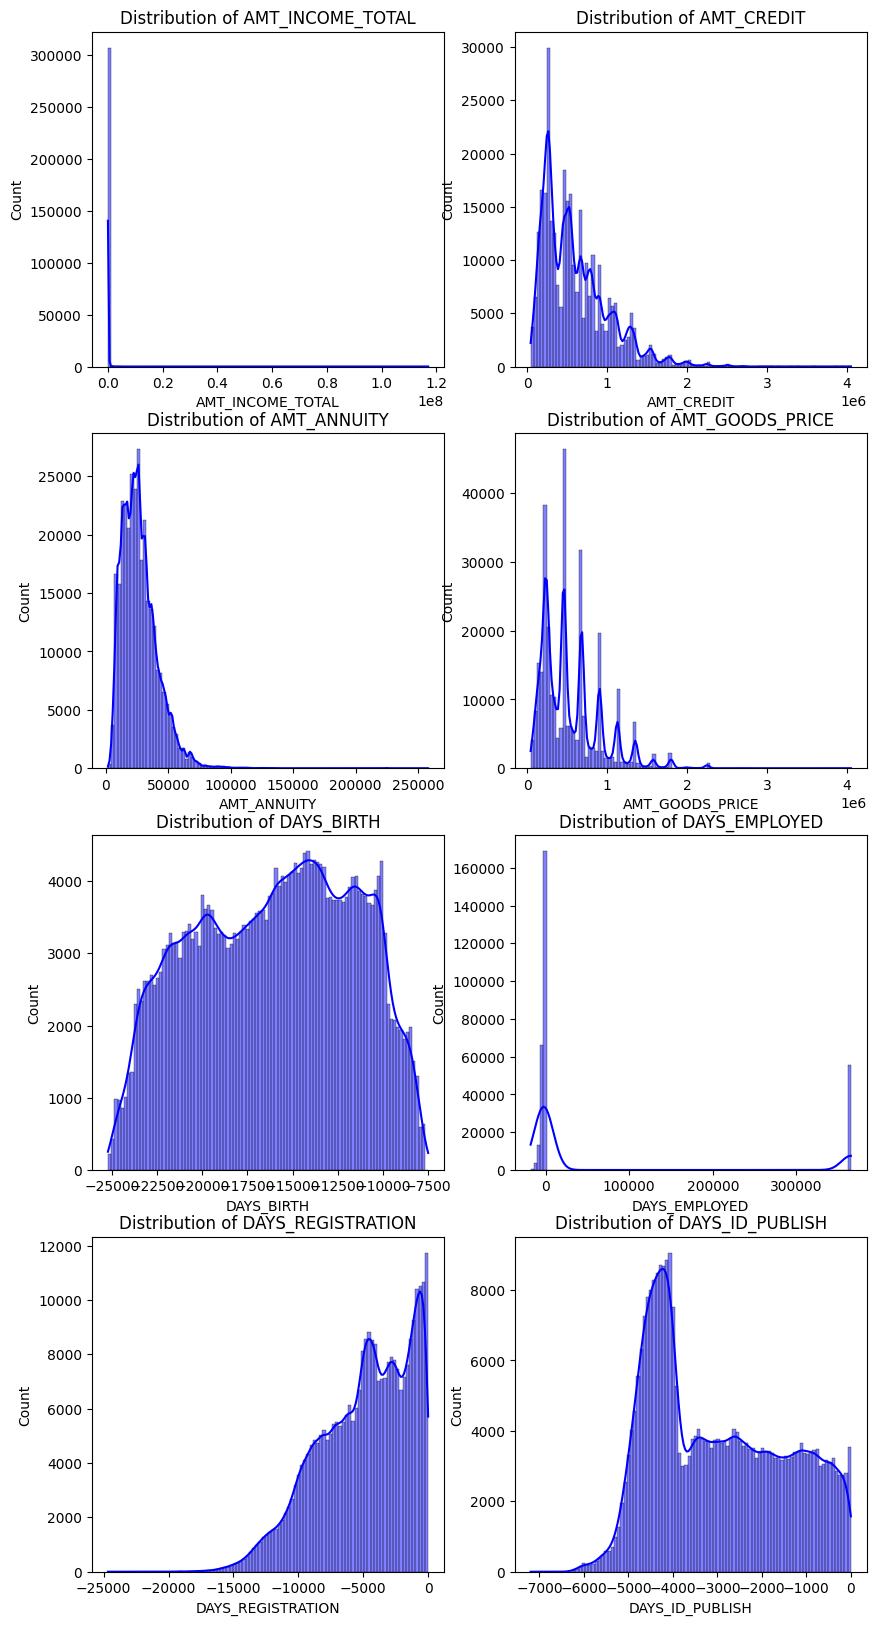

In [15]:
# Plot distribution of one feature
features= ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
plt.figure(figsize = (10 , 20))
for i , feature in enumerate(features,1):
    plt.subplot(len(features) //2,2,i)
    plt.title("Distribution of %s" % feature)
    sns.histplot(app_train[feature].dropna(),color='blue', kde=True,bins=100)

- DAYS_BIRTH: The negative value means that the date of birth is in the past. The age range is between approximative 20 and 68 years.
- DAYS_EMPLOYED: Most probably these negative values means Unemployed, It is not realistic such a large set of people employed more than 100 years

Text(0, 0.5, 'Count')

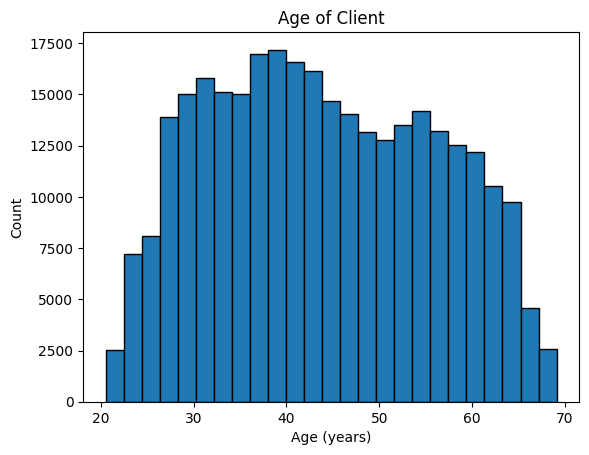

In [16]:
plt.hist(abs(app_train['DAYS_BIRTH']) / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client')
plt.xlabel('Age (years)')
plt.ylabel('Count')

Text(0.5, 1.0, 'EXt Source 3 Distribution')

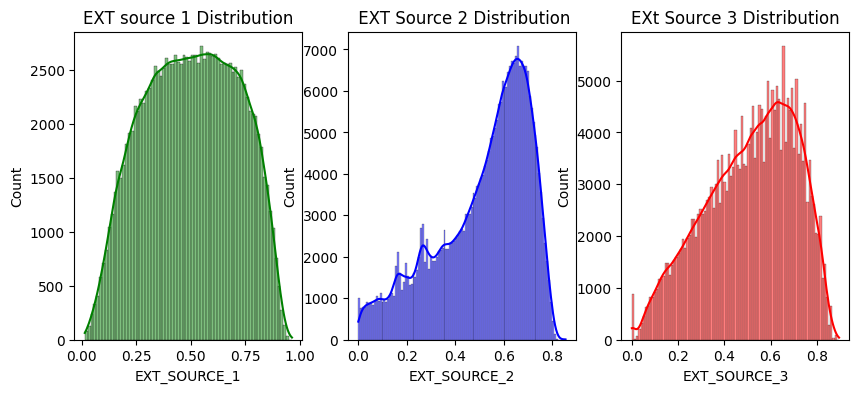

In [17]:
#Analysis Based on EXT Source Types
f, ax = plt.subplots(ncols=3,figsize=(10, 4))
sns.histplot(app_train.EXT_SOURCE_1.dropna(), kde=True, color="g", ax=ax[0]).set_title('EXT source 1 Distribution')
sns.histplot(app_train.EXT_SOURCE_2.dropna(), kde=True, color="b",ax=ax[1]).set_title(' EXT Source 2 Distribution') 
sns.histplot(app_train.EXT_SOURCE_3.dropna(), kde=True, color="r", ax=ax[2]).set_title('EXt Source 3 Distribution')

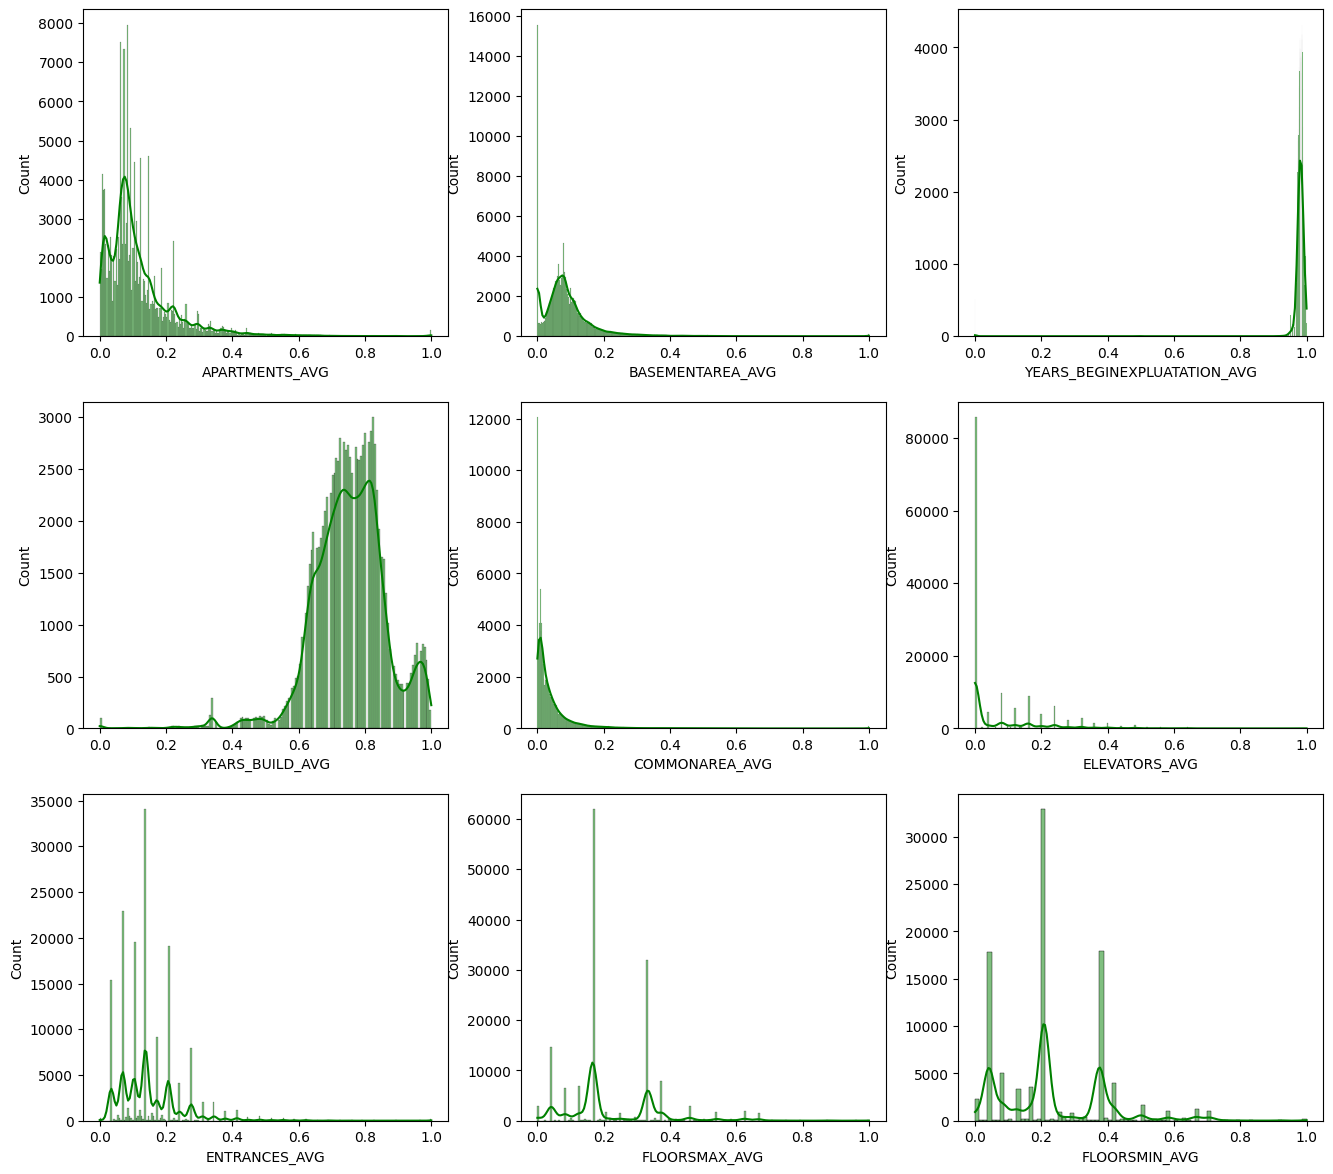

In [18]:
val_p=['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG']
plt.figure(figsize = (16,45))
for i , value in enumerate(val_p,1):
    plt.subplot(len(val_p)+1 //2,3,i)
    sns.histplot(app_train[value].dropna(), kde=True, color='g')

## Characteristics of people who not repay their loan

In [19]:
global_mean = app_train.TARGET.mean()
round(global_mean, 2)

0.08

- A group with a group rate higher than global_mean: the clients in this group are more likely to not repay loan than clients in general
- A group with a group rate lower than global_mean: the clients in this group are less likely to not repay loan than clients in general

In [20]:
# define function to calculate the percentage of target per category value and plot
def plot_stats(col,label_rotation=False,horizontal_layout=True):
    cat_perc=app_train[[col, 'TARGET']].groupby([col],as_index=False).mean().sort_values(by='TARGET', ascending=False)
    if(horizontal_layout): # to plot in 2 rows or 2 columns
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    s =sns.countplot(data = app_train , x= col, ax = ax1)
    if(label_rotation): # to rotate x labels
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    s =sns.barplot(x = col, y = "TARGET" , data = cat_perc , ax = ax2)
    s.axhline(global_mean, linewidth=3, color='b')
    plt.text(0, global_mean - 0.01, "global_mean", color='black', weight='semibold')
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show()

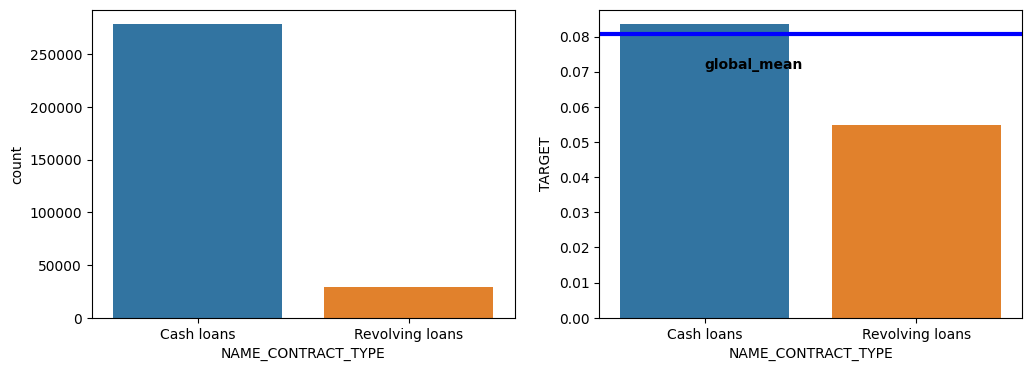

In [21]:
plot_stats('NAME_CONTRACT_TYPE')

- Revolving loans are just a small fraction from the total number of loans. But compared with their frequency, a larger amount of Revolving loans, are not repaid.

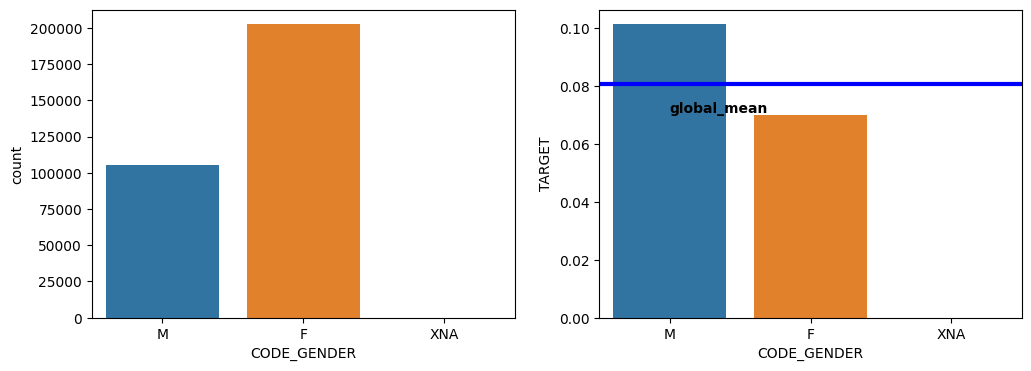

In [22]:
plot_stats('CODE_GENDER')

- The number of female clients is almost double the number of male clients. But, males have a higher chance of not repaying their loans (almost 10%), comparing with women (almost 7%).

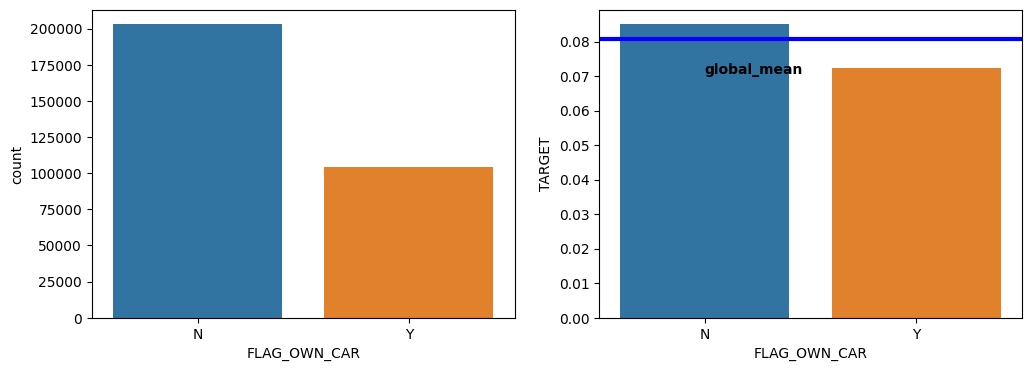

In [23]:
plot_stats('FLAG_OWN_CAR')

- Client owns a car are almost a half of the ones that doesn't own one. But they have a lower chance of not repaying their loans than the ones that doesn't own a car.

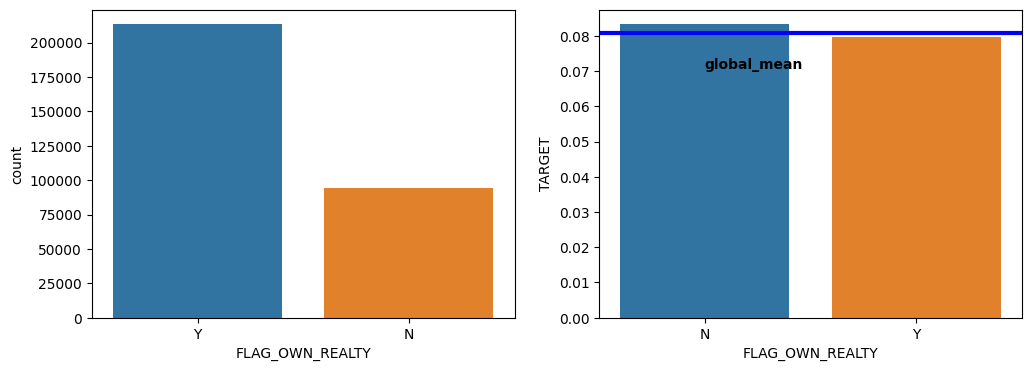

In [24]:
plot_stats('FLAG_OWN_REALTY')

- The clients who owns real estate are more than double of the ones that doesn't own. Both categories (owning real estate or not owning) have not-repayment rates less than 8%.

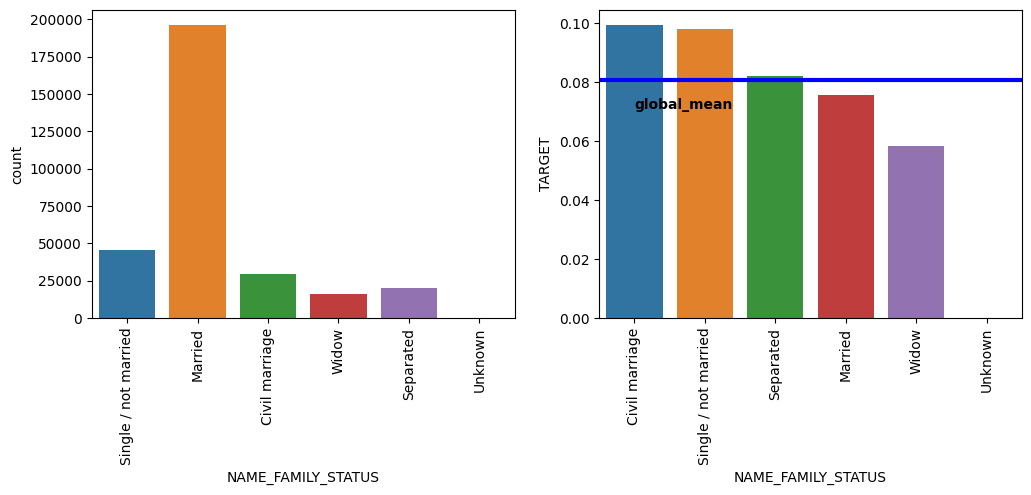

In [25]:
plot_stats('NAME_FAMILY_STATUS',True)

- Most of clients are married, But civil marriage and single clients has the highest percent of not repayment.

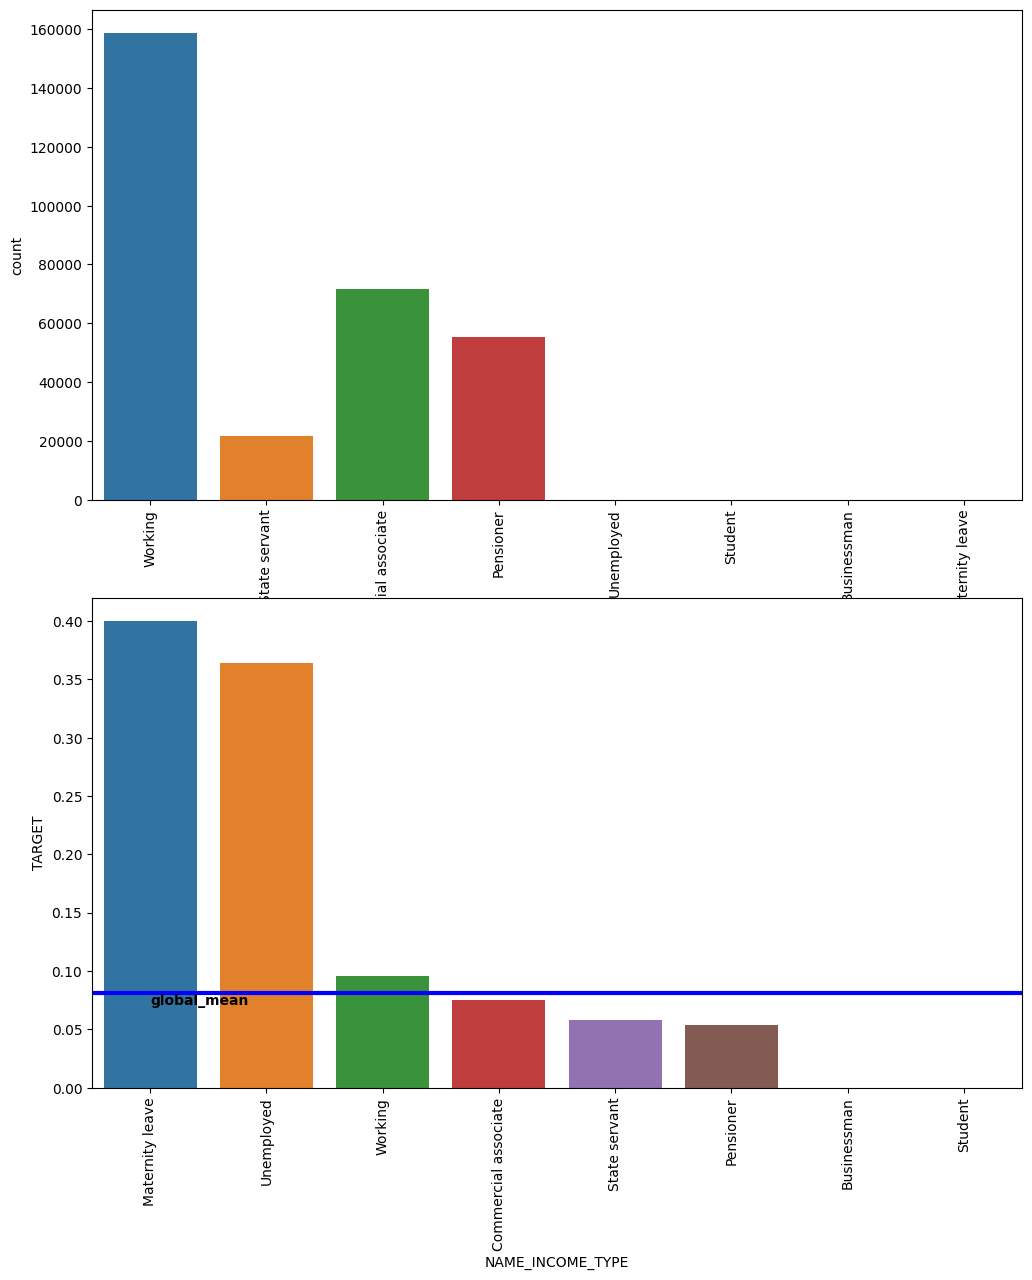

In [26]:
plot_stats('NAME_INCOME_TYPE',True,False)

- Most of clients have income from Working, followed by Commercial associate, Pensioner and State servant.
- Clients with maternity leave have not-repayment rates of almost 40%, followed by Unemployed (37%). The rest of types of incomes have not-repayment rates of 10%.

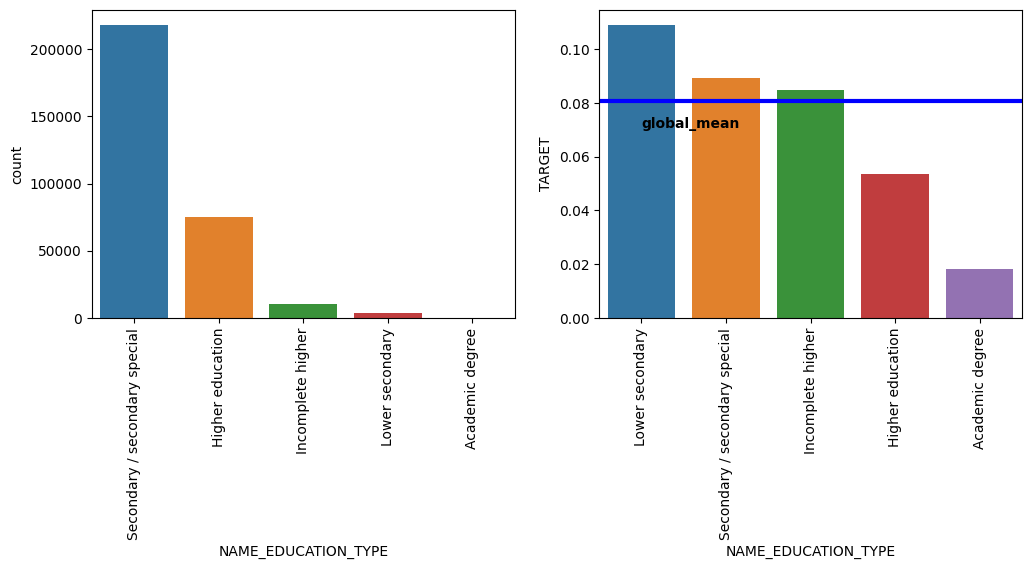

In [27]:
plot_stats('NAME_EDUCATION_TYPE',True)

- Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.
- The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% not-repayment rate.

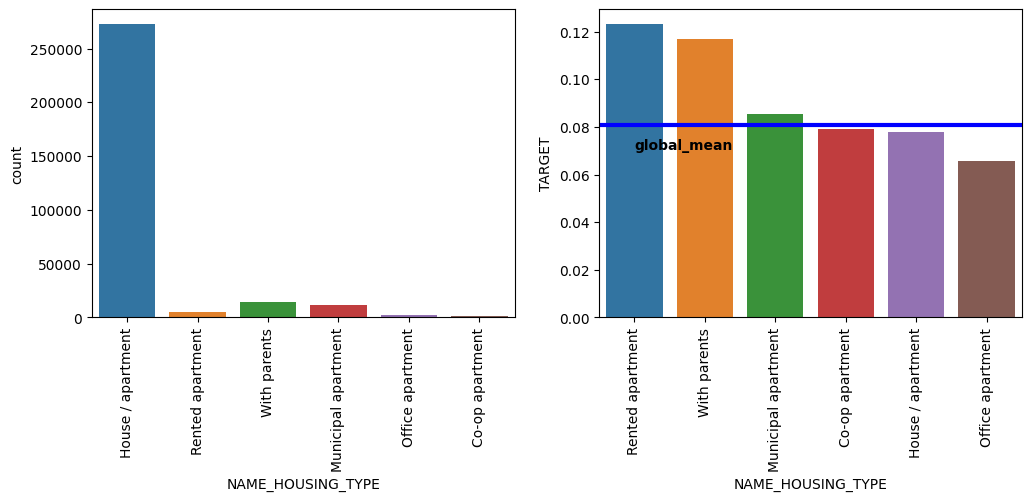

In [28]:
plot_stats('NAME_HOUSING_TYPE',True)

- Over 250,000 applicants for credits registered their housing as House/apartment. Following categories have a very small number of clients (With parents, Municipal appartment).
- From these categories, Rented apartment and With parents have higher than 10% not-repayment rate.

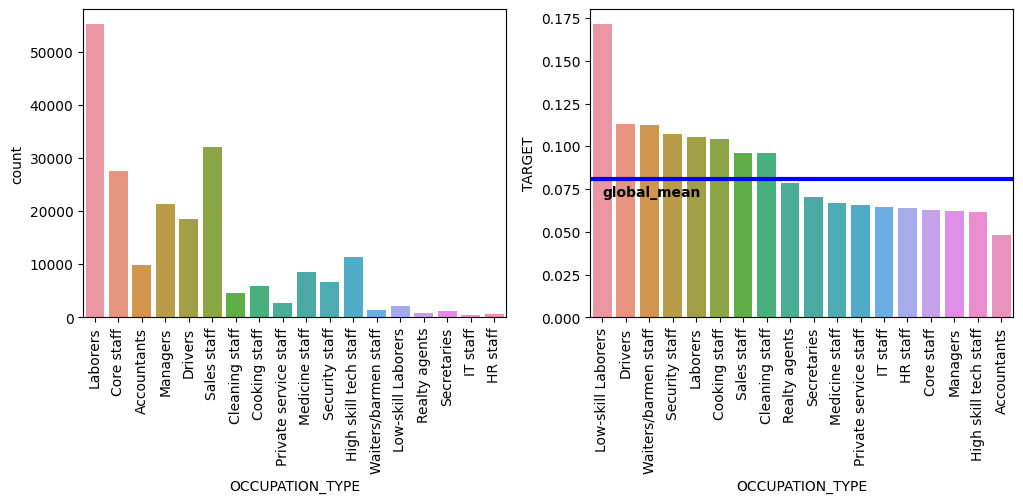

In [29]:
plot_stats('OCCUPATION_TYPE',True)

- Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.
- The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

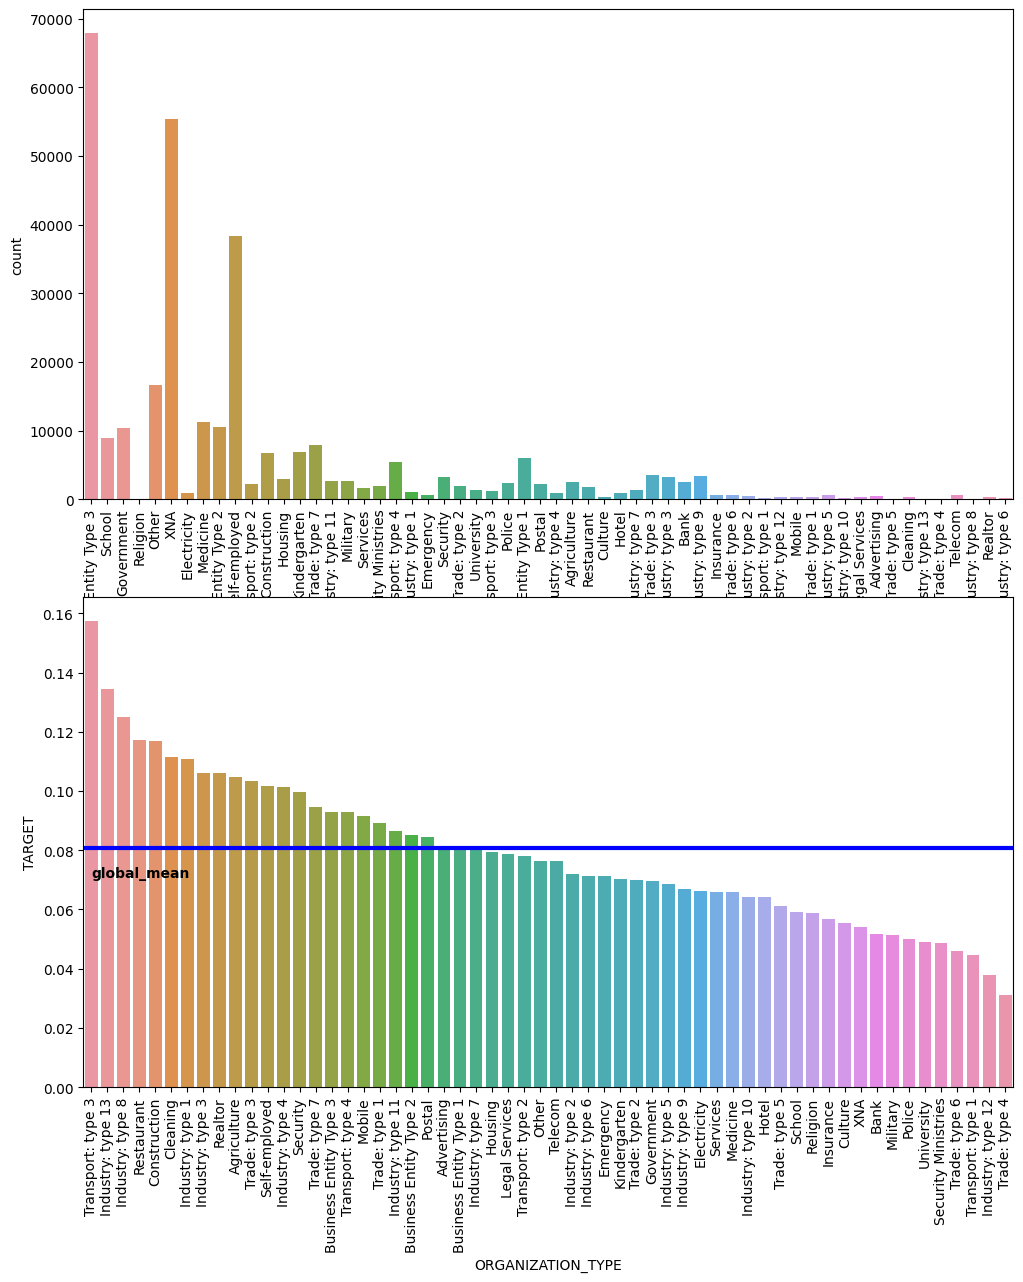

In [30]:
plot_stats('ORGANIZATION_TYPE',True, False)

- Oraganizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).

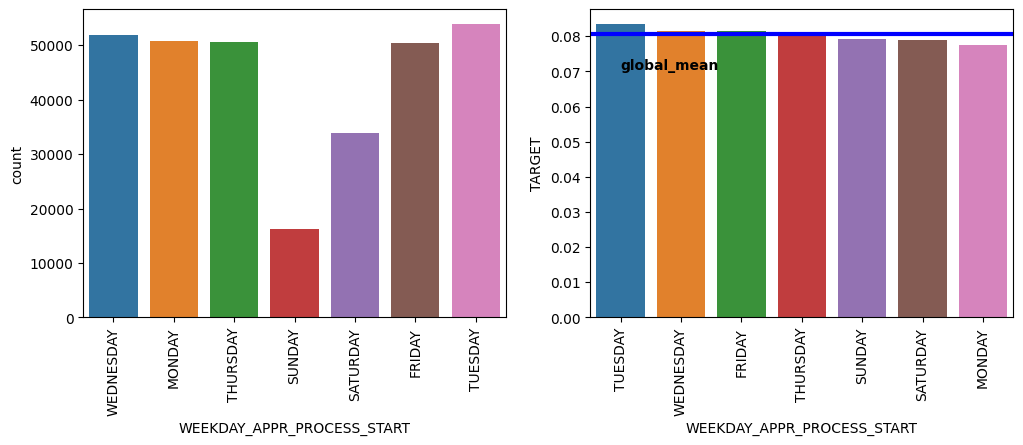

In [31]:
plot_stats('WEEKDAY_APPR_PROCESS_START',True)

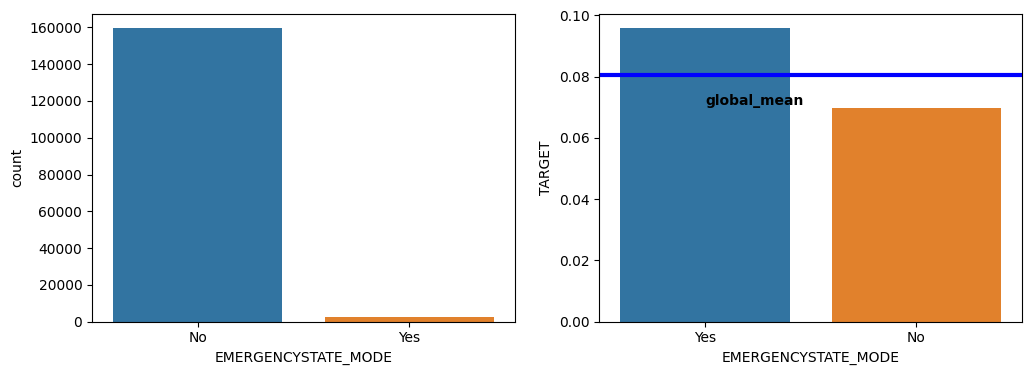

In [32]:
plot_stats('EMERGENCYSTATE_MODE')

## Mutual Information
- More efficient to compare features importance between categorical variables

In [33]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, app_train.TARGET)

df_mi = app_train[categorical_cols].notnull().apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
display(df_mi.head(8))
display(df_mi.tail(8))

,MI
EMERGENCYSTATE_MODE,0.000855
HOUSETYPE_MODE,0.000791
WALLSMATERIAL_MODE,0.000779
OCCUPATION_TYPE,0.000776
FONDKAPREMONT_MODE,0.000446
NAME_TYPE_SUITE,0.000022
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000


,MI
FLAG_OWN_CAR,0.0
FLAG_OWN_REALTY,0.0
NAME_INCOME_TYPE,0.0
NAME_EDUCATION_TYPE,0.0
NAME_FAMILY_STATUS,0.0
NAME_HOUSING_TYPE,0.0
WEEKDAY_APPR_PROCESS_START,0.0
ORGANIZATION_TYPE,0.0


- Higher values of mutual information mean a higher degree of dependence: if the mutual information between a categorical variable and the target is high, this categorical variable will be quite useful for predicting the target.

- On the other hand, if the mutual information is low, the categorical variable and the target are independent, and thus the variable will not be useful for predicting the target.

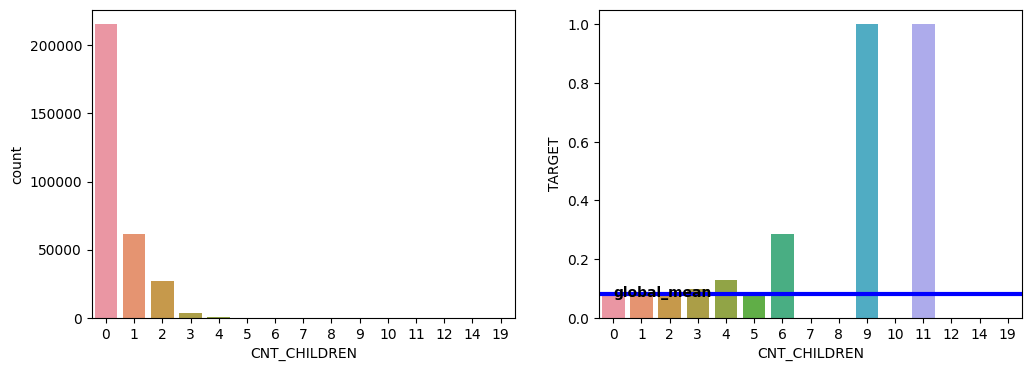

In [34]:
plot_stats('CNT_CHILDREN')

- Most of the clients taking a loan have no children, but have percents of no repayment around 10%.
- Number of clients with 1, 2 and 3 children are much smaller but have percents of no repayment around 10%.
- As for clients with 9 or 11 children are much more rare, but have percents of no repayment of 100%

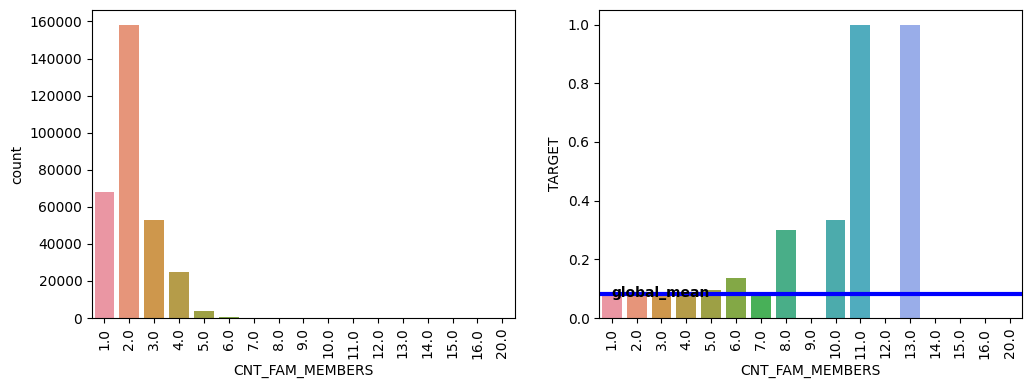

In [35]:
plot_stats('CNT_FAM_MEMBERS',True)

- Most of the clients are with family members of 2, but have not repayment rates close to the 10%.
- Family size of 1 (single persons), 3 (families with one child) and 4 are much less and also have not repayment rates close to the 10%.
- Families with 10 or 8 members are much more rare, but have percents of not repayment of loans over 30%.
- Clients with family size of 11 and 13 are much more rare, but have 100% not repayment rate.

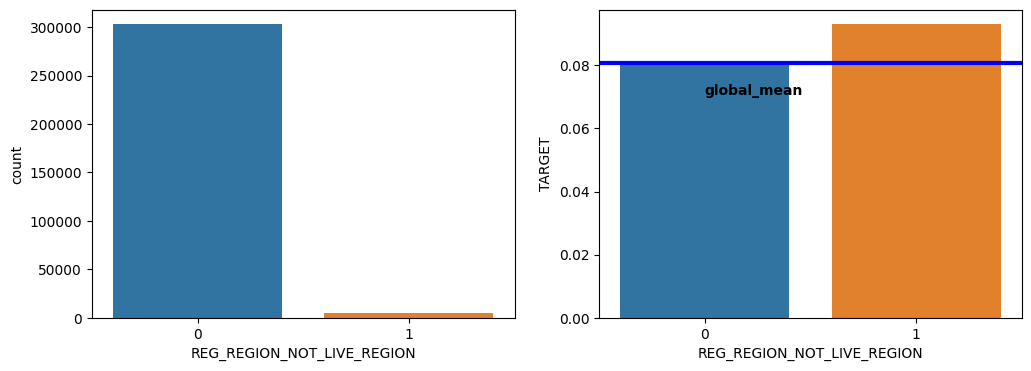

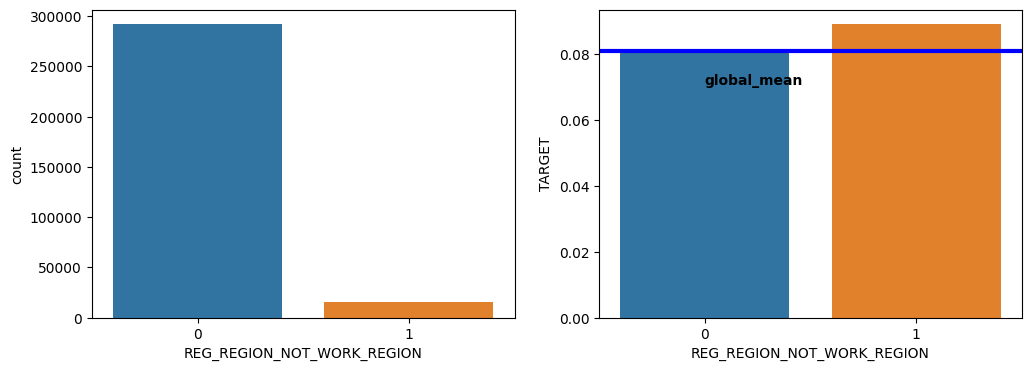

In [36]:
plot_stats('REG_REGION_NOT_LIVE_REGION')
plot_stats('REG_REGION_NOT_WORK_REGION')

- Very few people are registered in not live or not work region. Generally, not repayment rate is slightly larger for these cases than in the rest.

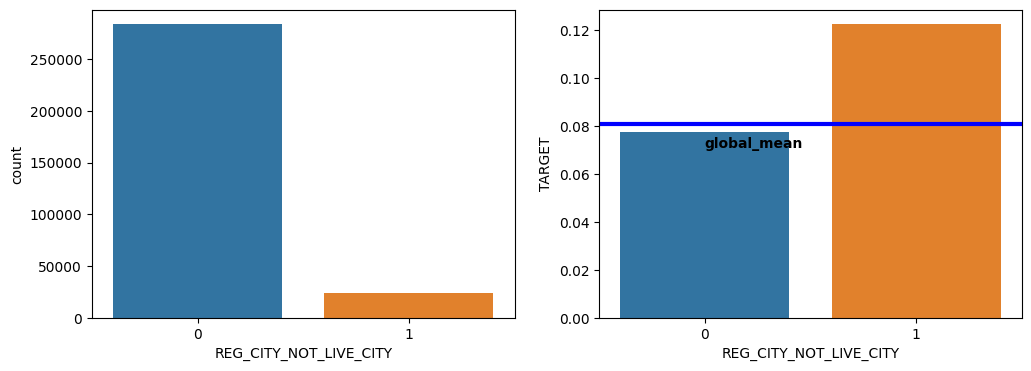

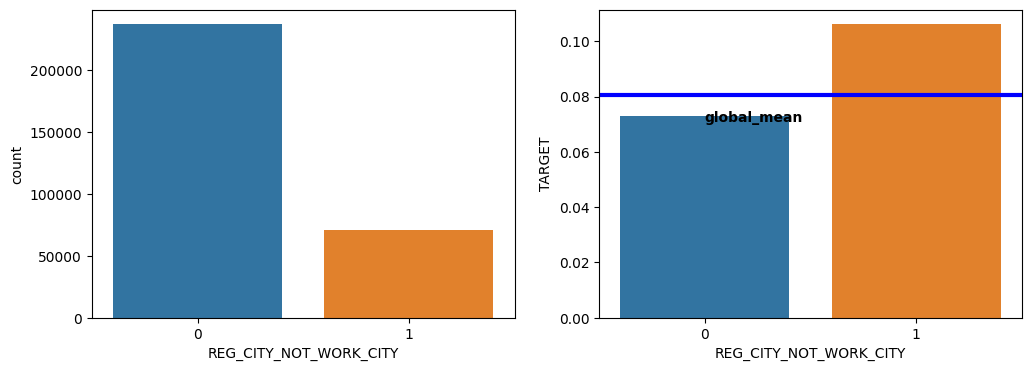

In [37]:
plot_stats('REG_CITY_NOT_LIVE_CITY')
plot_stats('REG_CITY_NOT_WORK_CITY')

- Generally, much more people register in the city they live or work (a larger number register differently in the working city than living city).
- The ones that register in different city than the working or living city are more frequently not-repaying the loans than the ones that register same city (work 11% or live 12%).

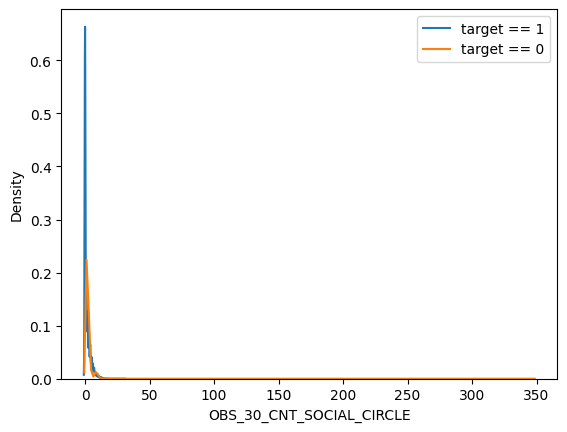

In [38]:
sns.kdeplot(app_train.loc[app_train['TARGET'] != 0, 'OBS_30_CNT_SOCIAL_CIRCLE'], label = 'target == 1')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'OBS_30_CNT_SOCIAL_CIRCLE'], label = 'target == 0')
plt.legend()

- client with more social surroundings with observable 30 days past due default tend not to pay their loans

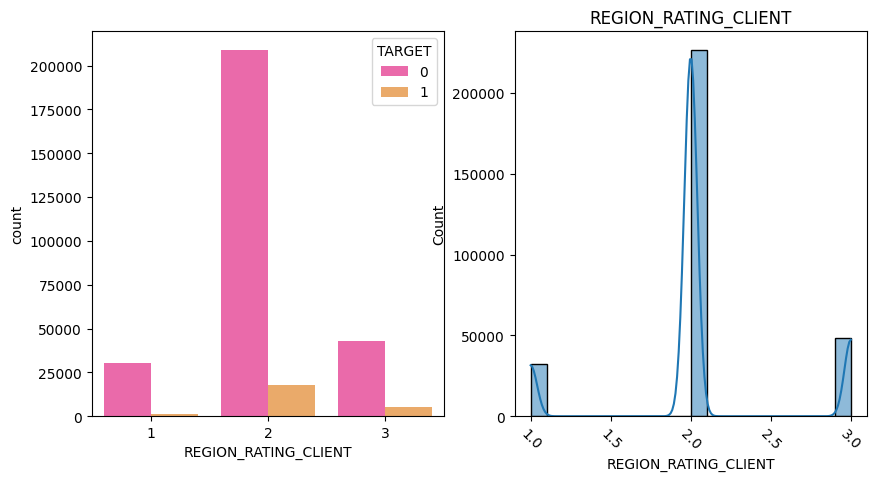

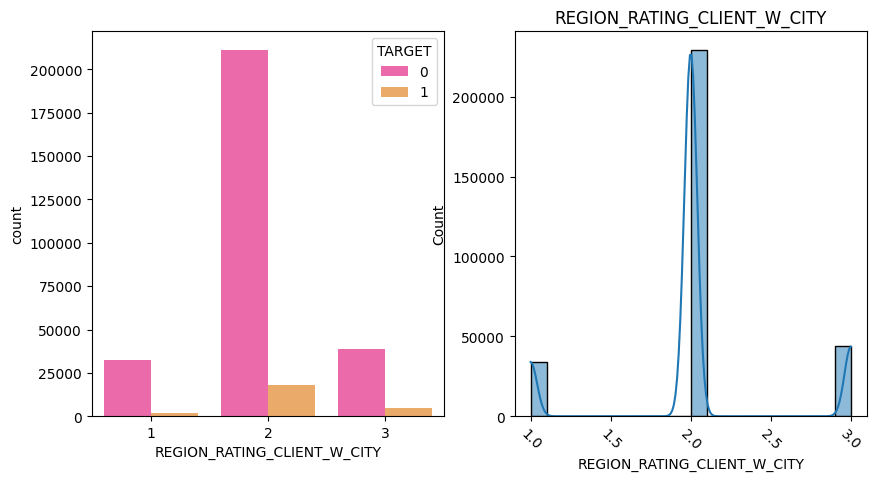

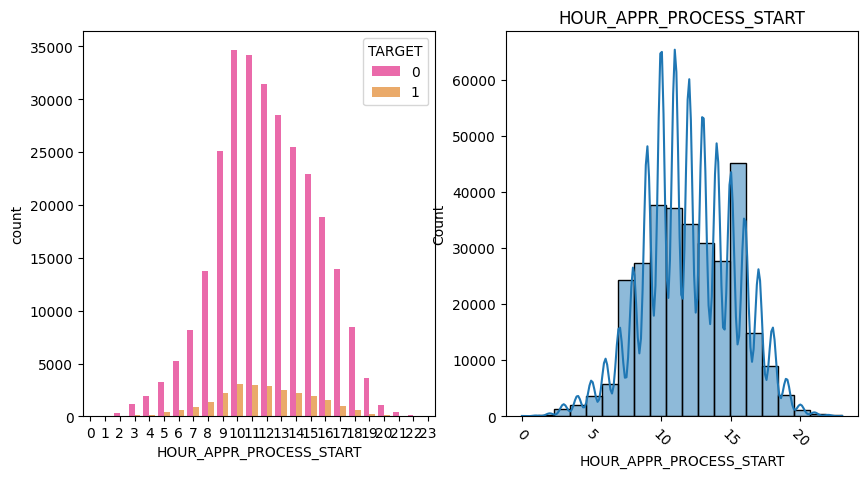

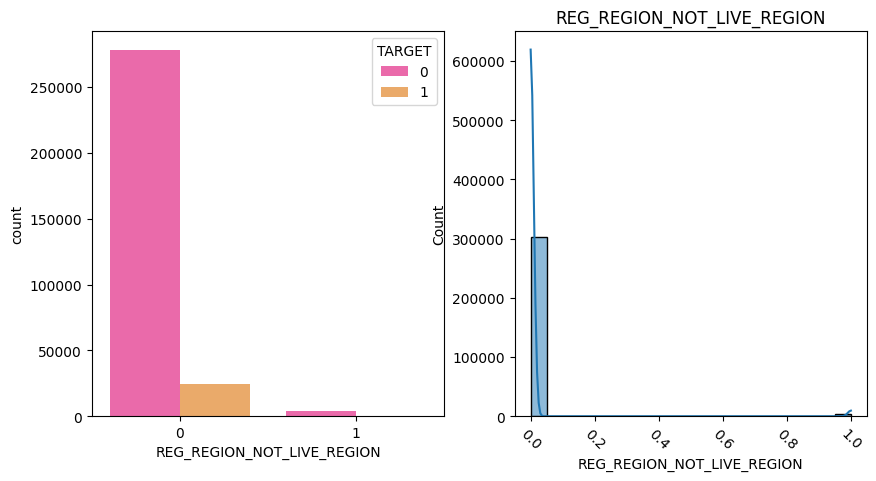

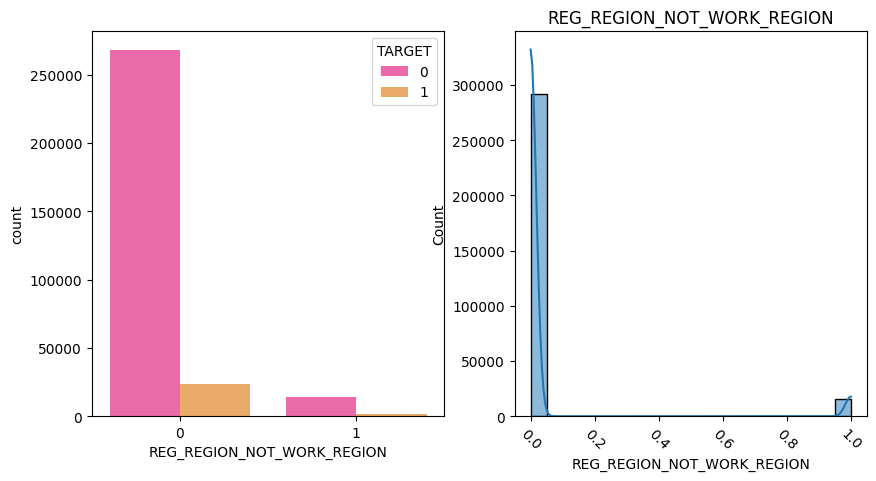

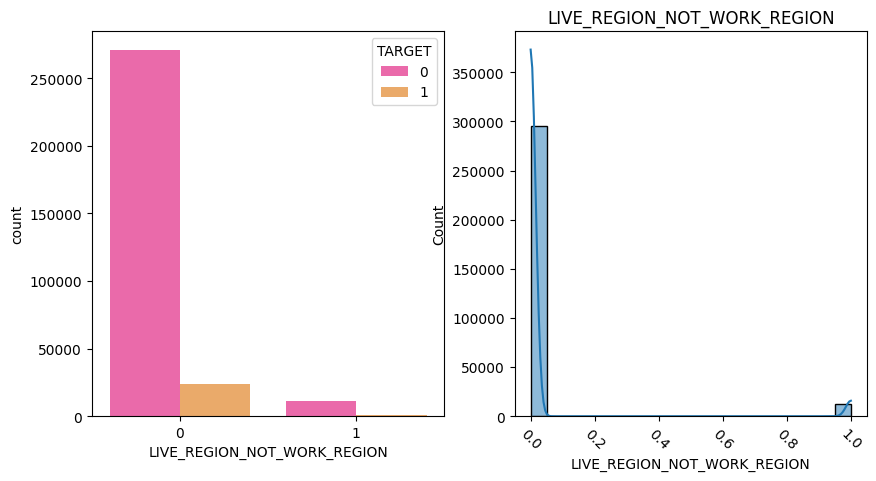

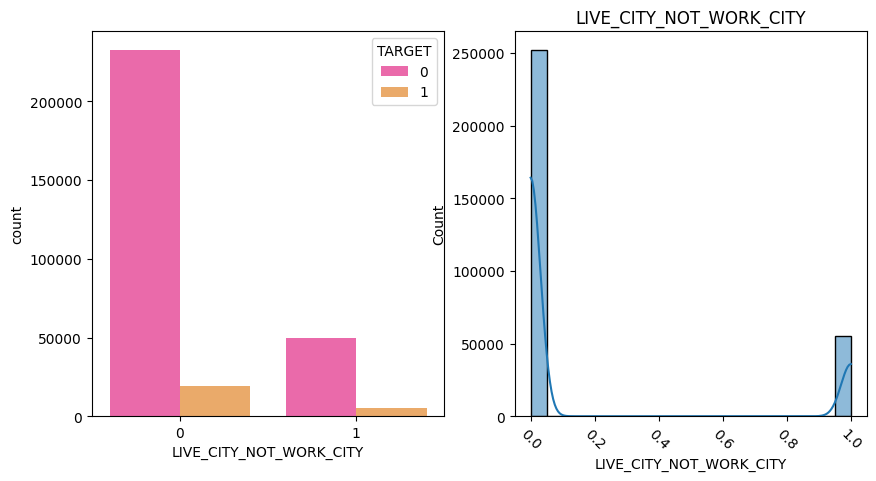

In [39]:
visual_dat= ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',\
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'LIVE_CITY_NOT_WORK_CITY']

for i in visual_dat:
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    sns.countplot(x=app_train[i],hue=app_train['TARGET'],palette="spring",ax = ax1)
    sns.histplot(app_train[i],bins= 20, kde=True, ax = ax2)
    plt.title(i)
    plt.xticks(rotation=-45)
    plt.show()

In [40]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
var = ['AMT_ANNUITY','AMT_GOODS_PRICE','DAYS_EMPLOYED', 'DAYS_REGISTRATION','DAYS_BIRTH','DAYS_ID_PUBLISH']
def plot_distribution_comp(var,nrow=len(var)//2):
    
    t1 = app_train.loc[app_train['TARGET'] != 0]
    t0 = app_train.loc[app_train['TARGET'] == 0]

    plt.figure(figsize = (15 , 15))
   
    for i, feature in enumerate(var,1):
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature],bw_method=0.05, label="TARGET = 1")
        sns.kdeplot(t0[feature],bw_method=0.05,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        plt.legend()
    plt.show()

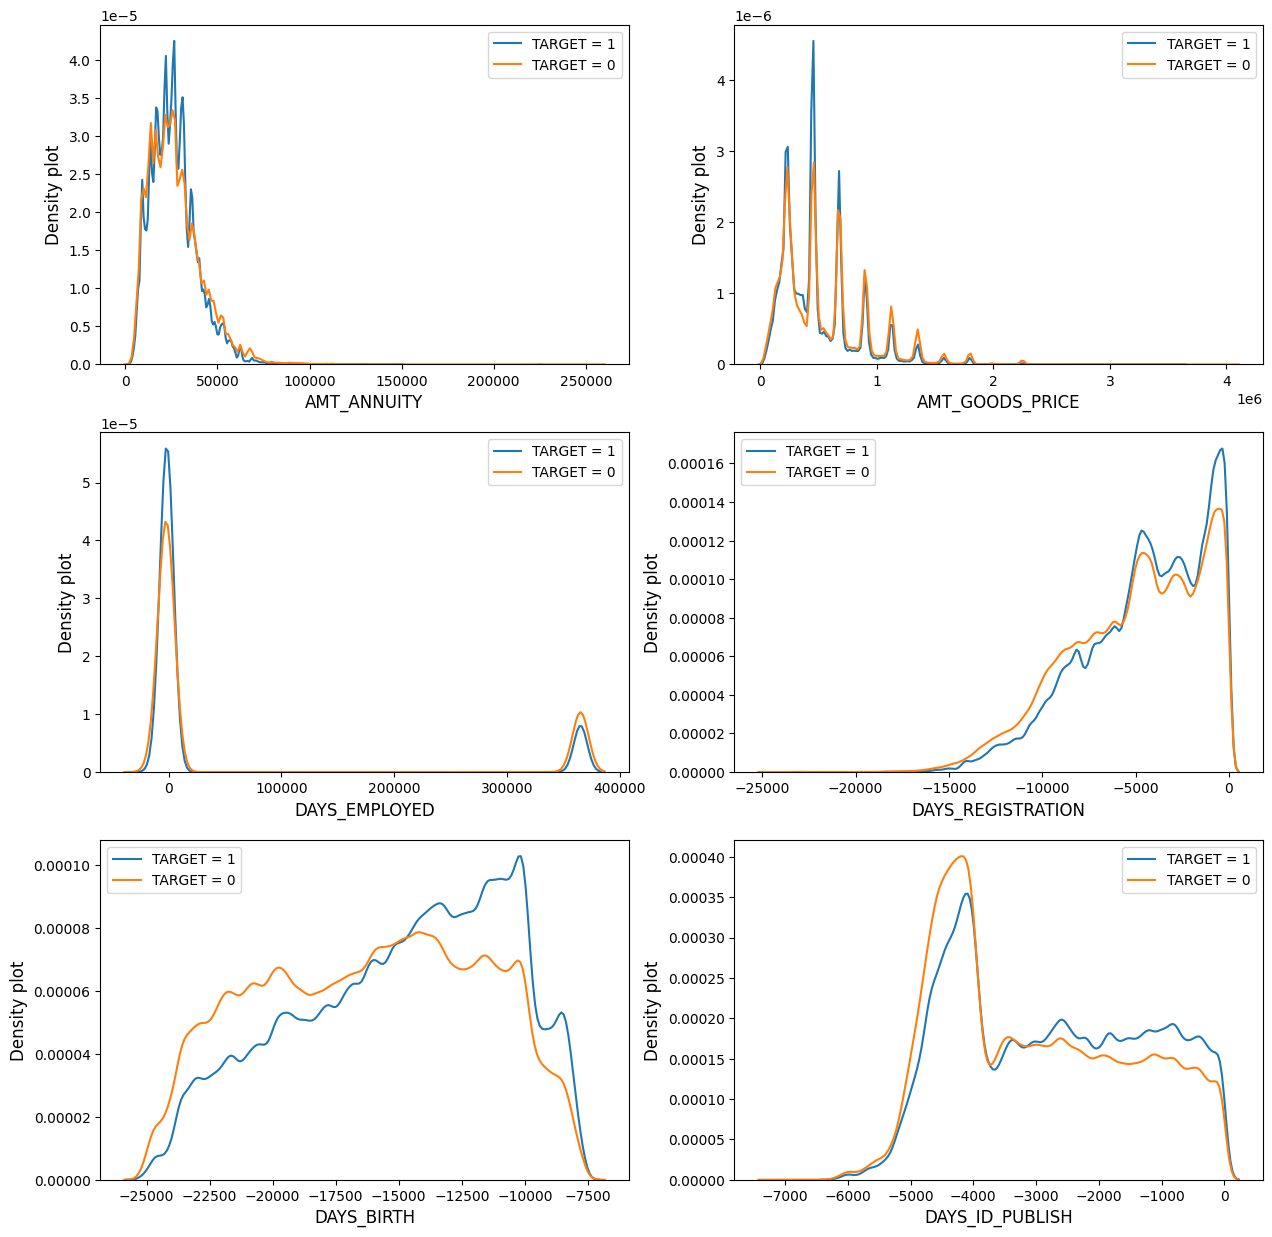

In [41]:
plot_distribution_comp(var)

- the value of DAYS_BIRTH is negative, meaning that as the client gets older, they are more likely to default on their loan (ie the target = 1). That's a little confusing, so will take the absolute value of the feature

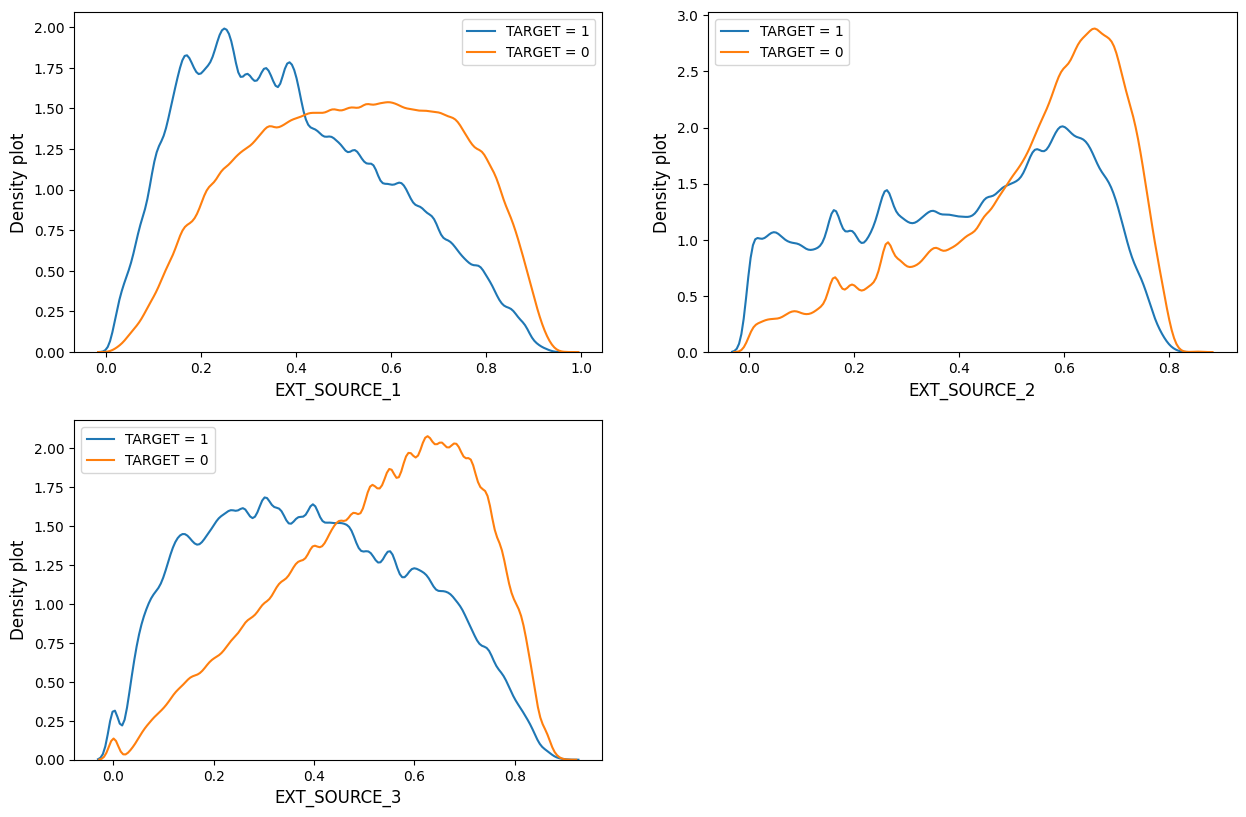

In [42]:
plot_distribution_comp(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])

- these features have some relationship to the likelihood of an applicant to repay a loan

## Anomalies
- remove negative values of DAYSBIRTH and DAYSEMPLOYED
- remove outlier from DAYSEMPLOYED

In [43]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

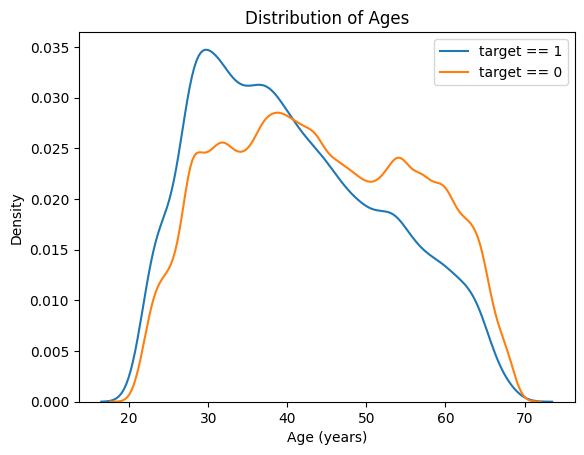

In [44]:
sns.kdeplot(app_train.loc[app_train['TARGET'] != 0, 'DAYS_BIRTH'] / 365, label = 'target == 1')
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.title('Distribution of Ages')
plt.legend()

- The target == 1 curve skews towards the younger end of the range, so as the client gets older they tend to repay their loans on time more often

In [45]:
# calculate the average value of the target for different age category
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

/tmp/ipykernel_32/869254353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365
/tmp/ipykernel_32/869254353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))


,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5, 1.0, 'Failure to Repay by Age Group')

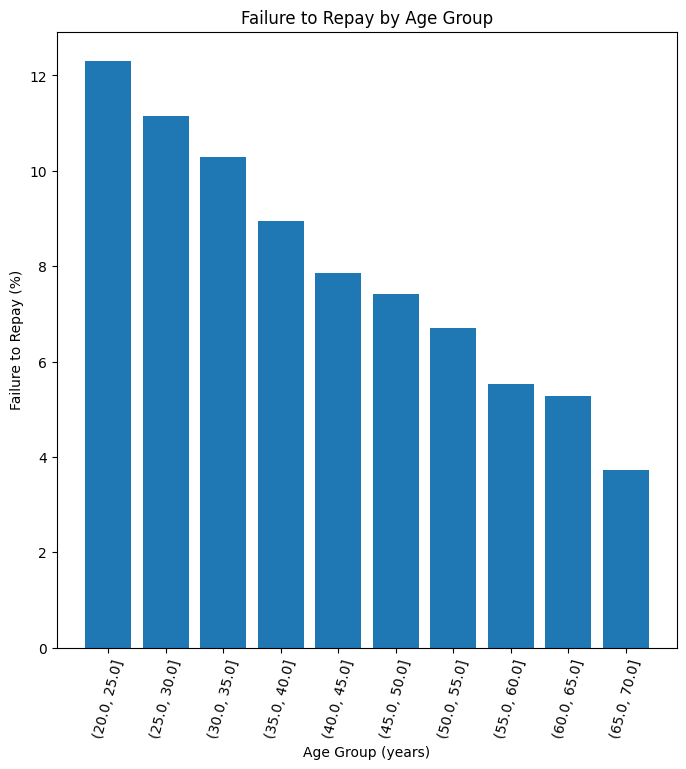

In [46]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)')
plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group')

- Younger clients are more likely to not repay the loan. The rate of failure to repay is above 10% for the youngest three age groups and beolow 5% for the oldest age group.

In [47]:
# get average days_employed for each target in train
days_emp=app_train.loc[app_train['DAYS_EMPLOYED'] != 365243]
days_emp_mean=days_emp.groupby(['TARGET'])['DAYS_EMPLOYED'].mean()
days_emp_mean

TARGET
0   -2438.140133
1   -1814.918800
Name: DAYS_EMPLOYED, dtype: float64

- mean days-employed for clients who repay their loans is higher than average days-employed for clients who do not repay their loans

In [48]:
# Replace the outlier values with nan 
dict1=days_emp.groupby(['TARGET'])['DAYS_EMPLOYED'].mean().to_dict()
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_train['DAYS_EMPLOYED'].isnull().sum()

55374

In [49]:
# Replace nan with average days_employed for target
app_train['DAYS_EMPLOYED']=app_train.DAYS_EMPLOYED.fillna(app_train.TARGET.map(dict1))
app_train['DAYS_EMPLOYED'].isnull().sum()

0

In [50]:
app_train['DAYS_EMPLOYED']=abs(app_train['DAYS_EMPLOYED'])

In [51]:
# convert extreme values in AMT_ANNUITY and OBS_30_CNT_SOCIAL_CIRCLE to null
app_train['AMT_ANNUITY'] = np.where(app_train['AMT_ANNUITY']>100000 , np.nan, app_train['AMT_ANNUITY'])
app_train['OBS_30_CNT_SOCIAL_CIRCLE'] = np.where(app_train['OBS_30_CNT_SOCIAL_CIRCLE']>10 , np.nan, app_train['OBS_30_CNT_SOCIAL_CIRCLE'])

## Missing values

In [52]:
# Missing values statistics
total = app_train.isnull().sum().sort_values(ascending = False)
percent = ((app_train.isna().sum()/len(app_train))*100).sort_values(ascending = False)
missing_values=pd.concat([total, percent], axis=1, keys=['Total_na', 'Percent_na'])
missing_values.reset_index()


,index,Total_na,Percent_na
0,COMMONAREA_AVG,214865,69.872297
1,COMMONAREA_MODE,214865,69.872297
2,COMMONAREA_MEDI,214865,69.872297
3,NONLIVINGAPARTMENTS_AVG,213514,69.432963
4,NONLIVINGAPARTMENTS_MODE,213514,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,69.432963
6,FONDKAPREMONT_MODE,210295,68.386172
7,LIVINGAPARTMENTS_MEDI,210199,68.354953
8,LIVINGAPARTMENTS_AVG,210199,68.354953
9,LIVINGAPARTMENTS_MODE,210199,68.354953


Text(0.5, 1.0, 'Percent missing data by feature')

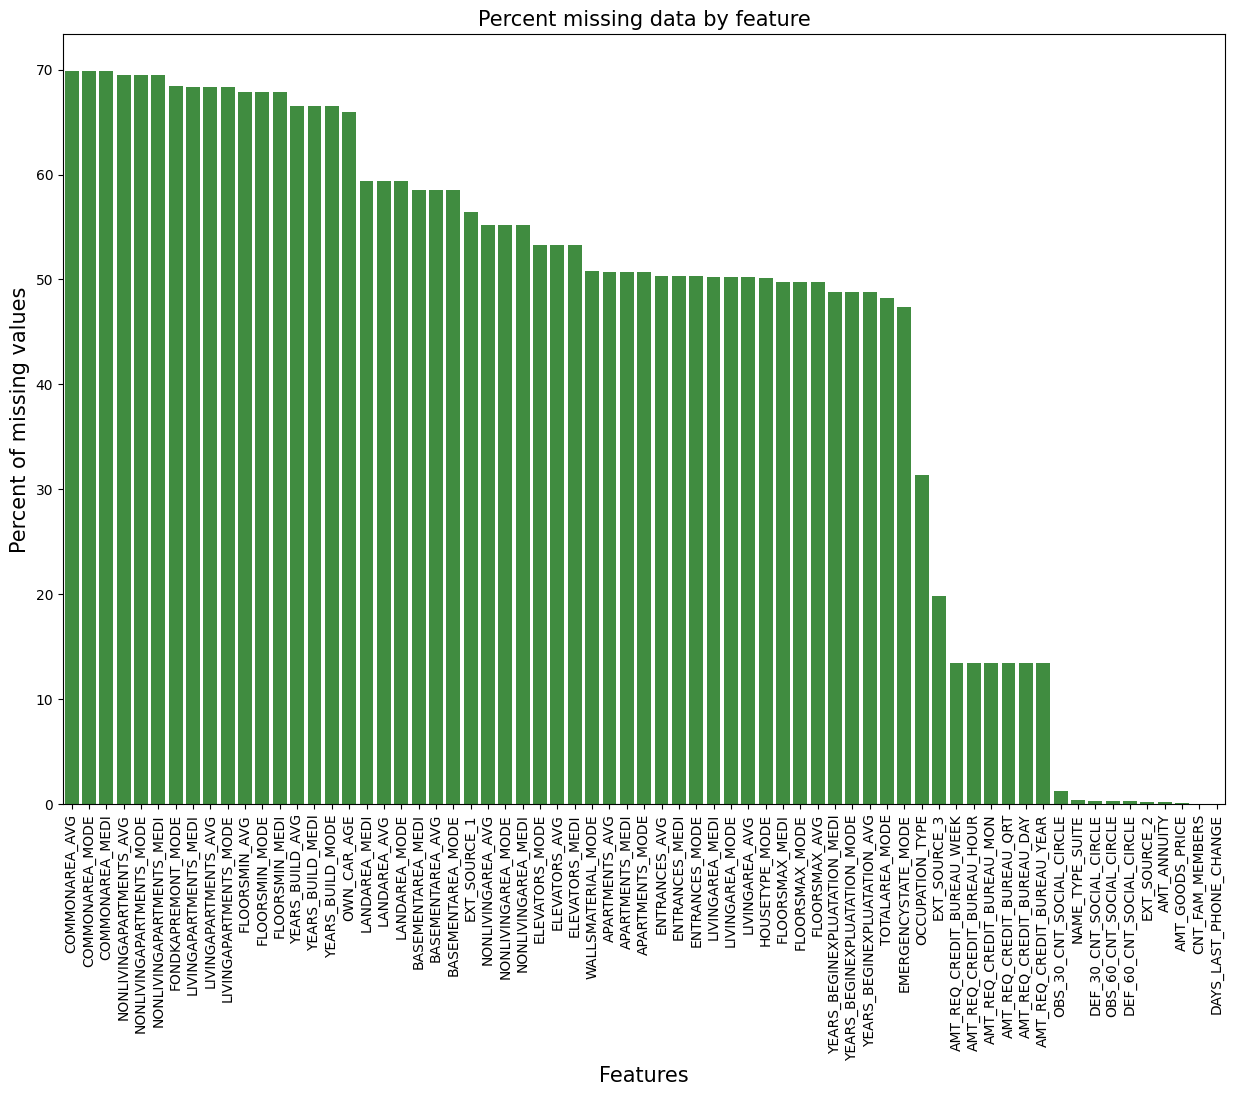

In [53]:
ms= missing_values[missing_values["Percent_na"] > 0]
f,ax =plt.subplots(figsize=(15,10))
plt.xticks(rotation=90)
sns.barplot(x=ms.index, y=ms["Percent_na"],color="green",alpha=0.8)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

1. It appears there are many applicants who leave blank the information for their housing 
2. Can use the missing data as a feature itself by counting missing values or transforming them

<Axes: >

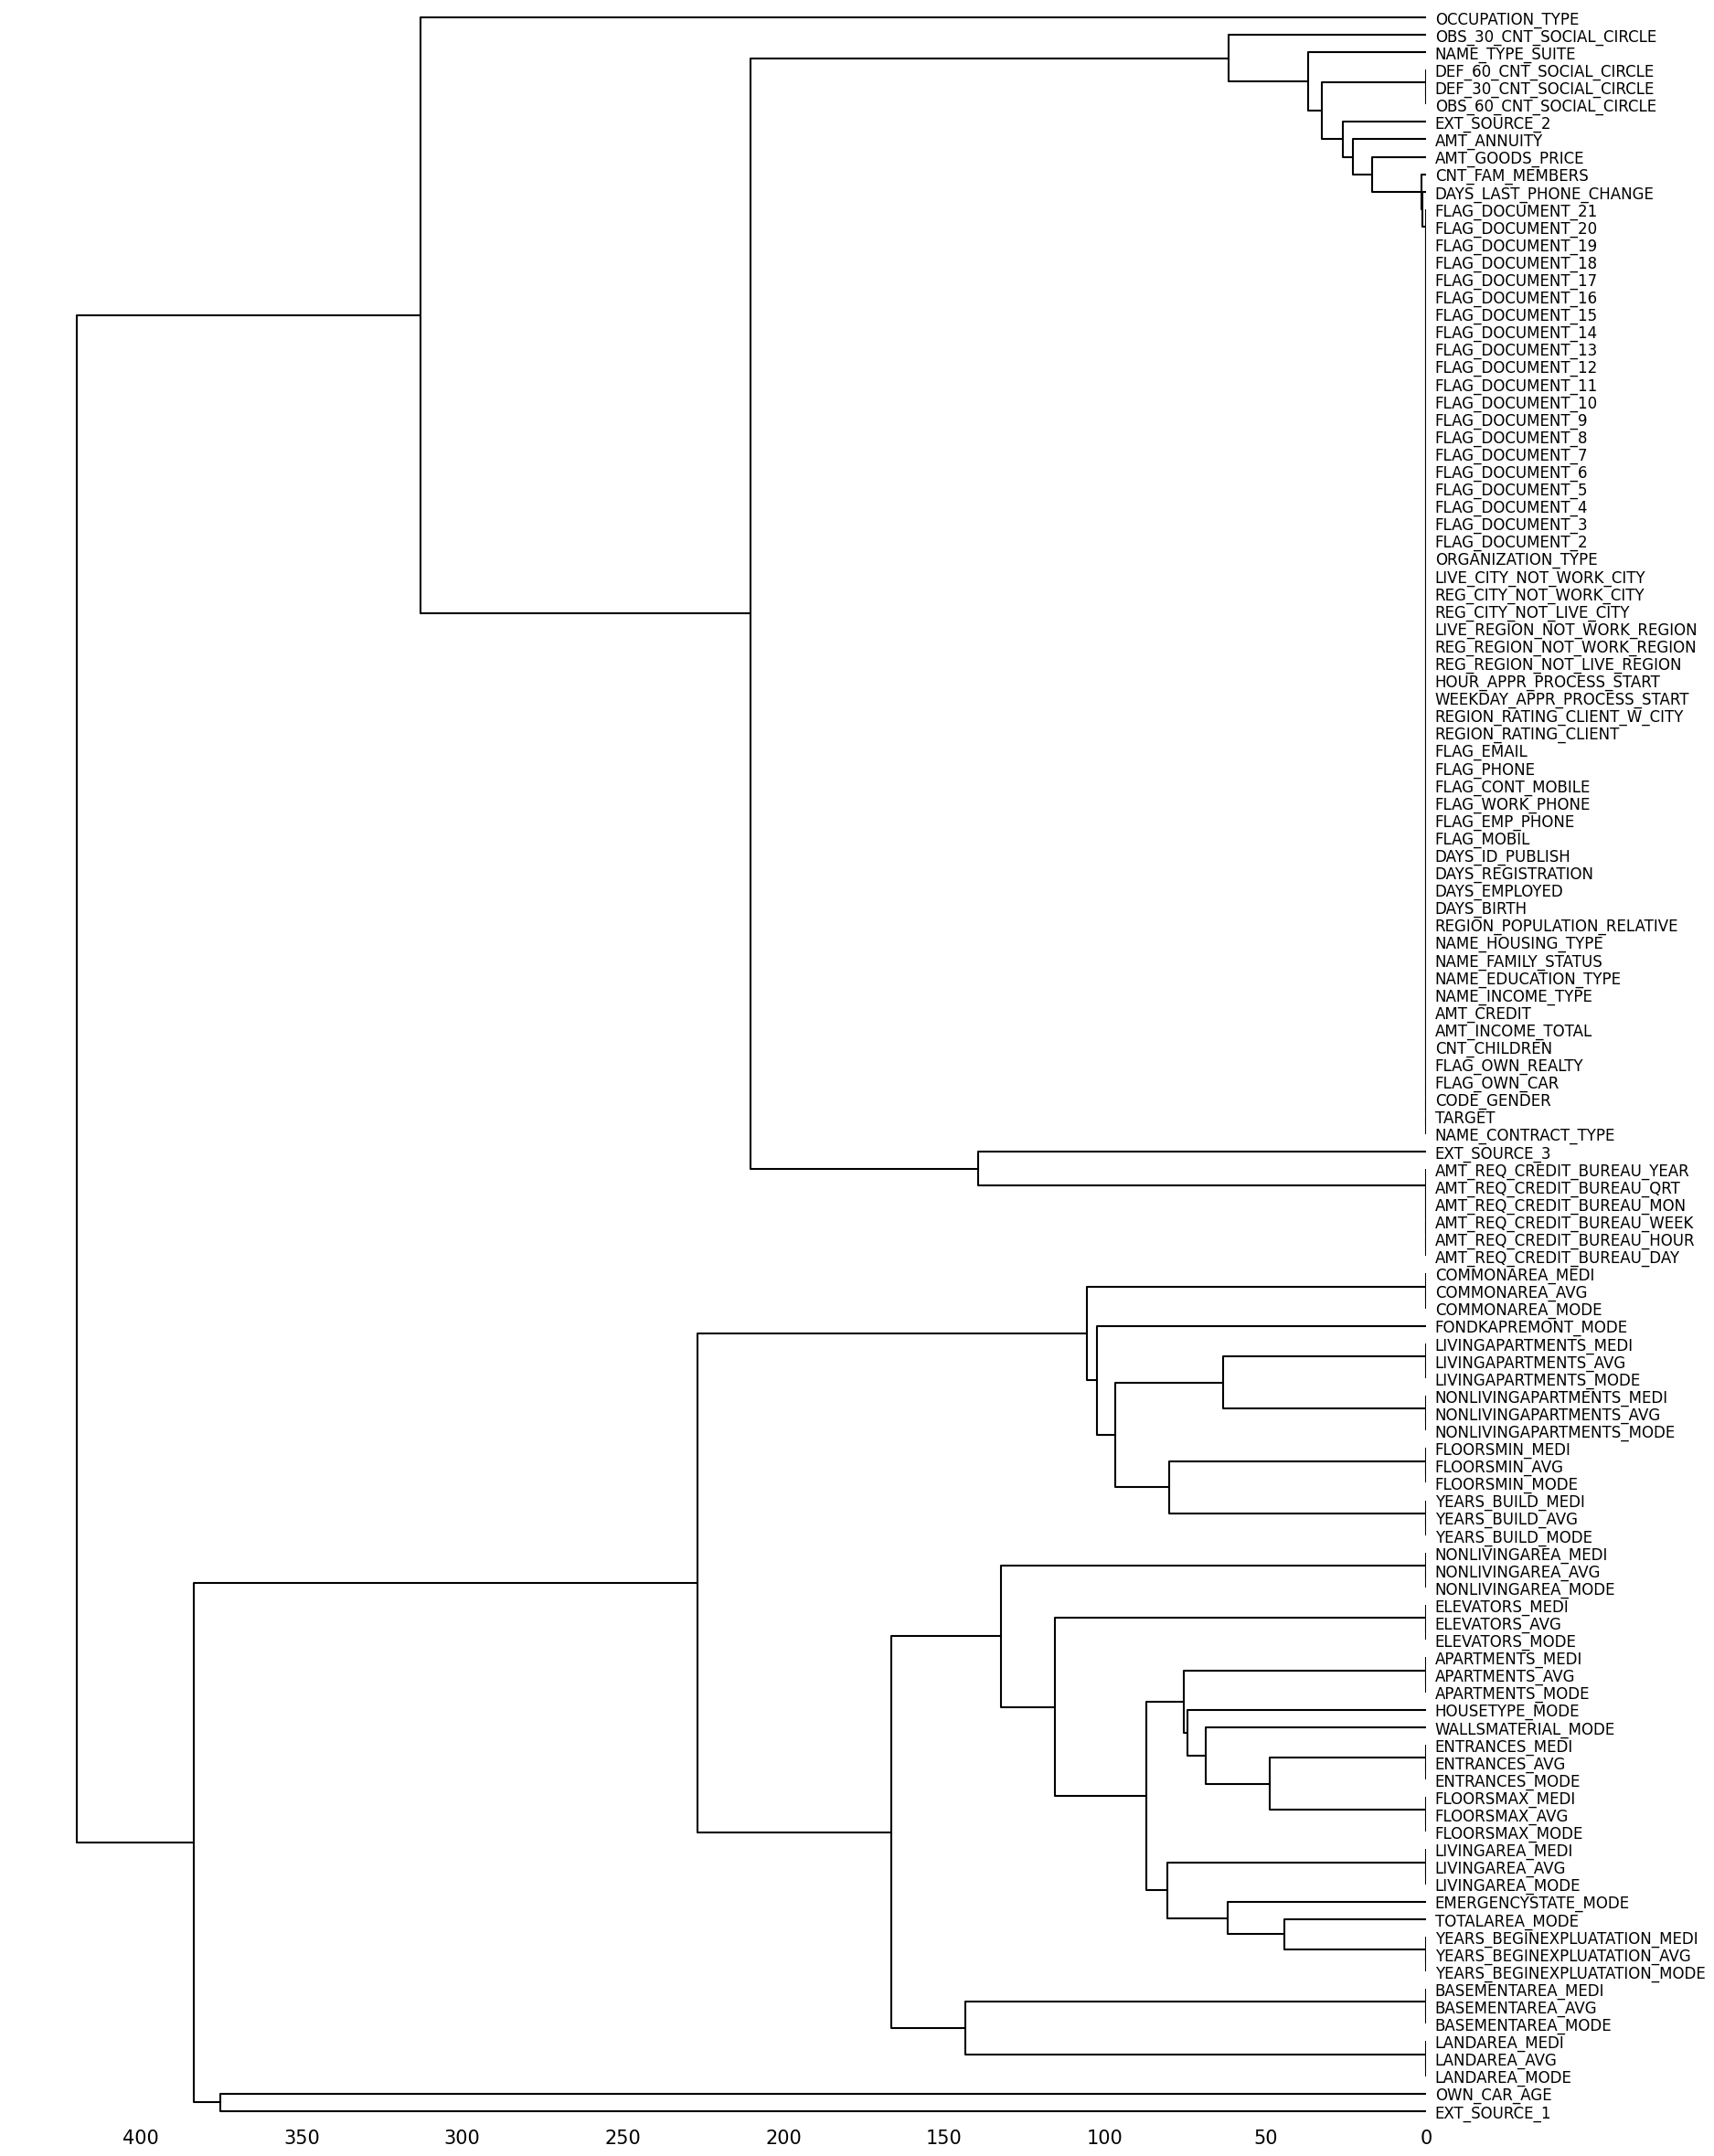

In [54]:
import missingno as msno
msno.dendrogram(app_train, fontsize=12, figsize=(20,30))

- The dendrogram view shows how missing values are related across columns by using hierarchical clustering

In [55]:
# Comparison of Completed Applications
app_train_comp=app_train.copy()
app_train_comp['incomplete'] = 1
app_train_comp.loc[app_train_comp.isnull().sum(axis=1) < 35, 'incomplete'] = 0

mean_c = np.mean(app_train_comp.loc[app_train_comp['incomplete'] == 0, 'TARGET'].values)
mean_i = np.mean(app_train_comp.loc[app_train_comp['incomplete'] == 1, 'TARGET'].values)
print('default ratio for more complete: {:.1%} \ndefault ratio for less complete: {:.1%}'.format(mean_c, mean_i))

default ratio for more complete: 6.9% 
default ratio for less complete: 9.2%


- There appears to be a difference. Viewed one way, borrowers with incomplete applications are ~30% more likely to default.
- I will add a binary feature called 'no_housing_info'. The feature is flagged if it has more than 45 blanks and will try to use it to replace features with null values greater than 50% of their values.

In [56]:
# add a binary feature called 'incomplete_var'. The application is flagged if it has more than 45 blanks
app_train['no_housing_info'] = 1
app_train.loc[app_train.isnull().sum(axis=1) < 45, 'no_housing_info'] = 0

In [57]:
app_train['no_housing_info'].value_counts()

no_housing_info
0    158136
1    149375
Name: count, dtype: int64

In [58]:
app_train['no_housing_info'].corr(app_train['TARGET'])

0.041012229099077264

In [59]:
# drop columns with nan values greater than 50% of their values
app_train_copy= app_train.copy()
large_ms= missing_values[missing_values["Percent_na"] > 50].index
app_train_copy.drop(large_ms, axis=1, inplace=True)
print(app_train.shape)
print(len(large_ms))
print(app_train_copy.shape)

(307511, 122)
41
(307511, 81)


## Feature engineering

In [60]:
# Some simple new features (percentages)
app_train_copy['CREDIT_INCOME_PERCENT'] = app_train_copy['AMT_CREDIT'] / app_train_copy['AMT_INCOME_TOTAL']
app_train_copy['ANNUITY_INCOME_PERCENT'] = app_train_copy['AMT_ANNUITY'] / app_train_copy['AMT_INCOME_TOTAL']
app_train_copy['CREDIT_TERM'] = app_train_copy['AMT_ANNUITY'] / app_train_copy['AMT_CREDIT']
app_train_copy['DAYS_EMPLOYED_PERCENT'] = app_train_copy['DAYS_EMPLOYED'] / app_train_copy['DAYS_BIRTH']
app_train_copy['INCOME_PER_PERSON'] = app_train_copy['AMT_INCOME_TOTAL'] / app_train_copy['CNT_FAM_MEMBERS']

- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

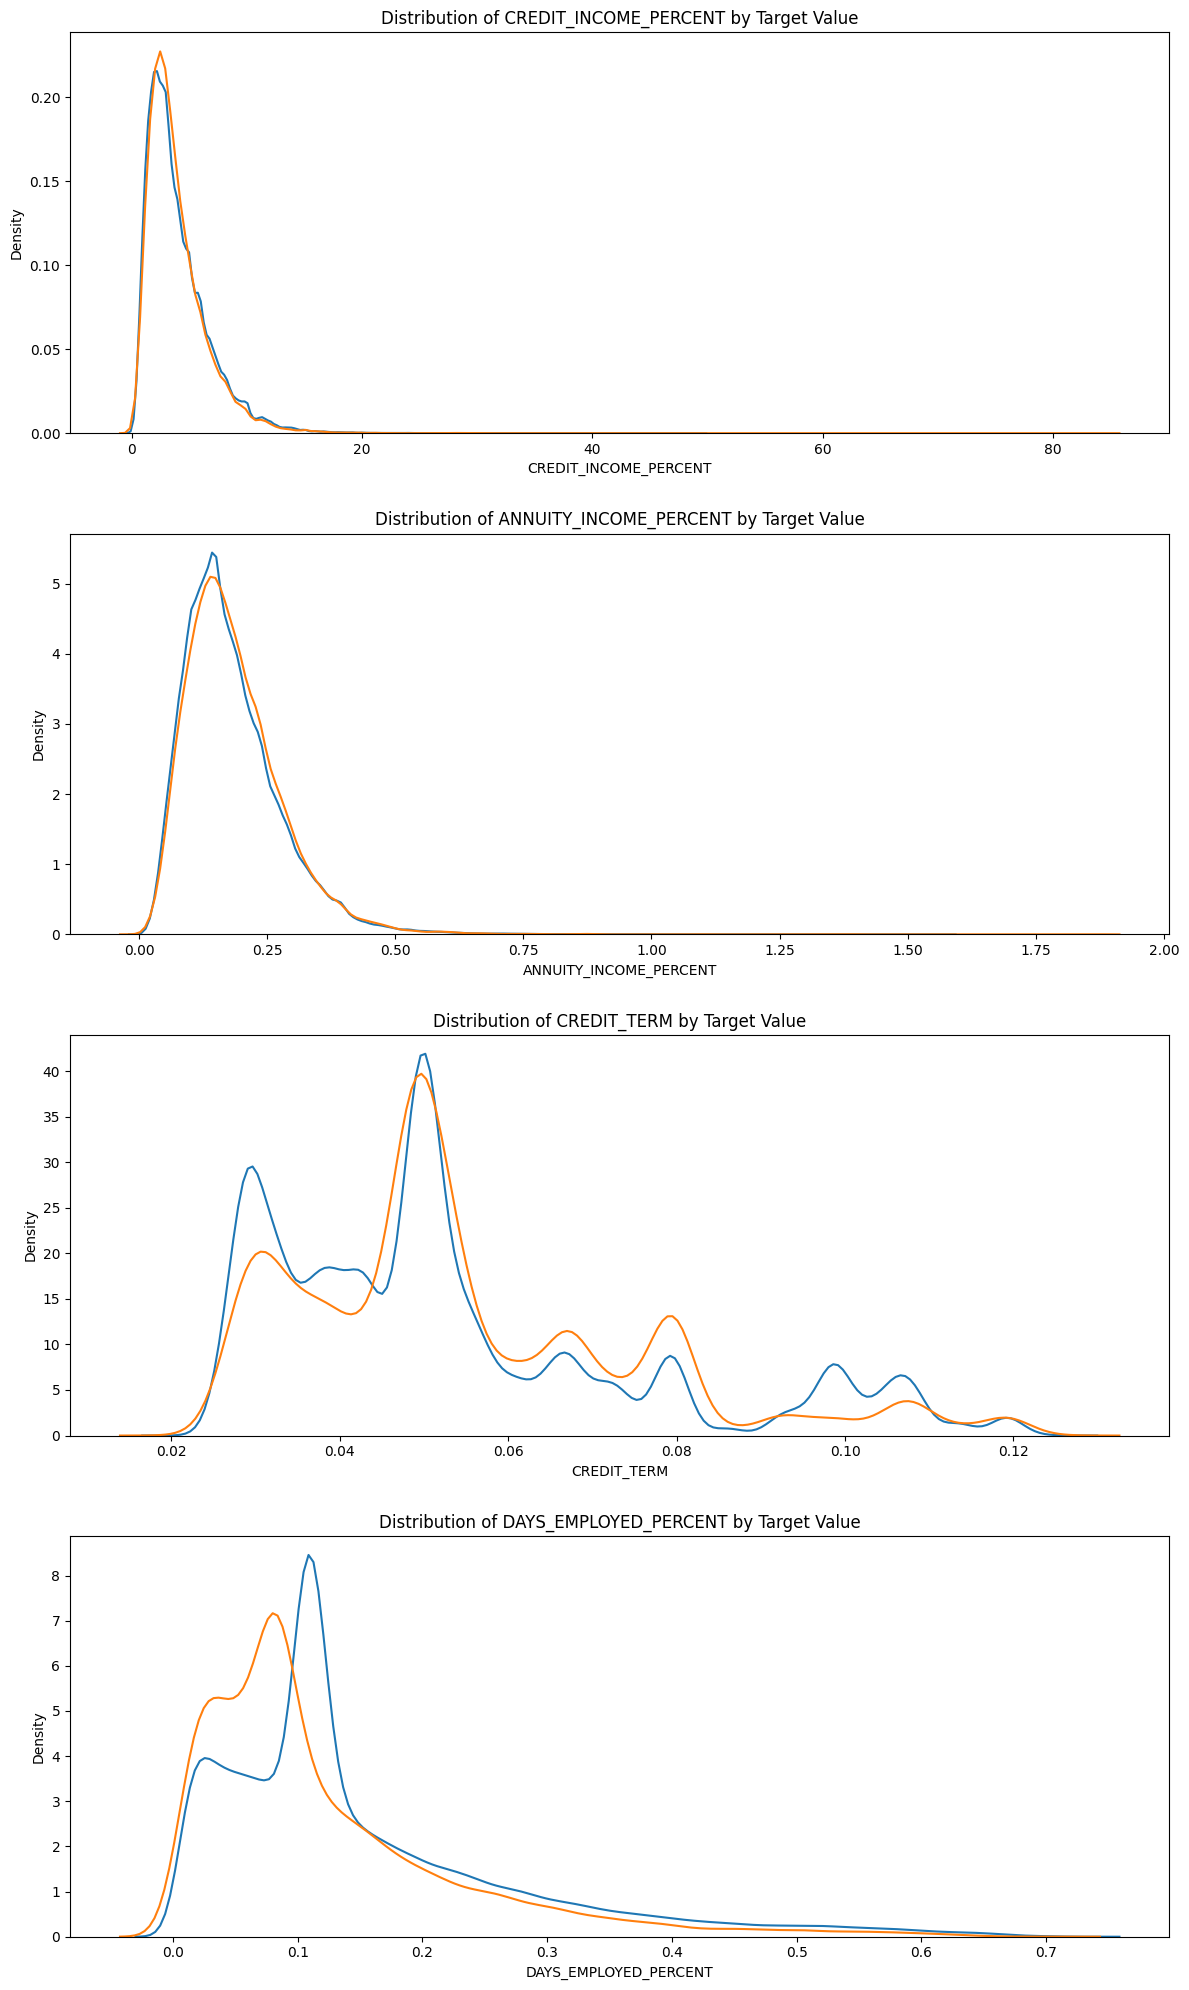

In [61]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # create a new subplot for each source
    plt.subplot(4, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_copy.loc[app_train_copy['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_copy.loc[app_train_copy['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [62]:
# delete features used in calculating new features
app_train_copy.drop(['AMT_CREDIT','AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT','DAYS_EMPLOYED','DAYS_BIRTH'], axis=1, inplace=True)

In [64]:
# sample of raw data
app_train1 = app_train.sample(10000)
app_train1.to_csv('application_train1.csv')

In [65]:
# sample of clean data
app_train_copy1 = app_train_copy.sample(10000)
app_train_copy1.to_csv('app_train.csv')

## Correlations

In [66]:
# Find correlations with the target and sort
numerical_col1 = app_train_copy.select_dtypes(exclude = 'O').columns
correlations = app_train_copy[numerical_col1].corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(16))
print('\nMost Negative Correlations:\n', correlations.head(16))

Most Positive Correlations:
 AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
no_housing_info                0.041012
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                   -0.178919
EXT_SOURCE_2                   -0.160472
DAYS_EMPLOYED_PERCENT          -0.063598
FLOORSMAX_AVG                  -0.044003
FLOORSMAX_MEDI                 -0.043768
FLOORSMAX_MODE                 -0.043226
AMT_GOODS_PRICE           

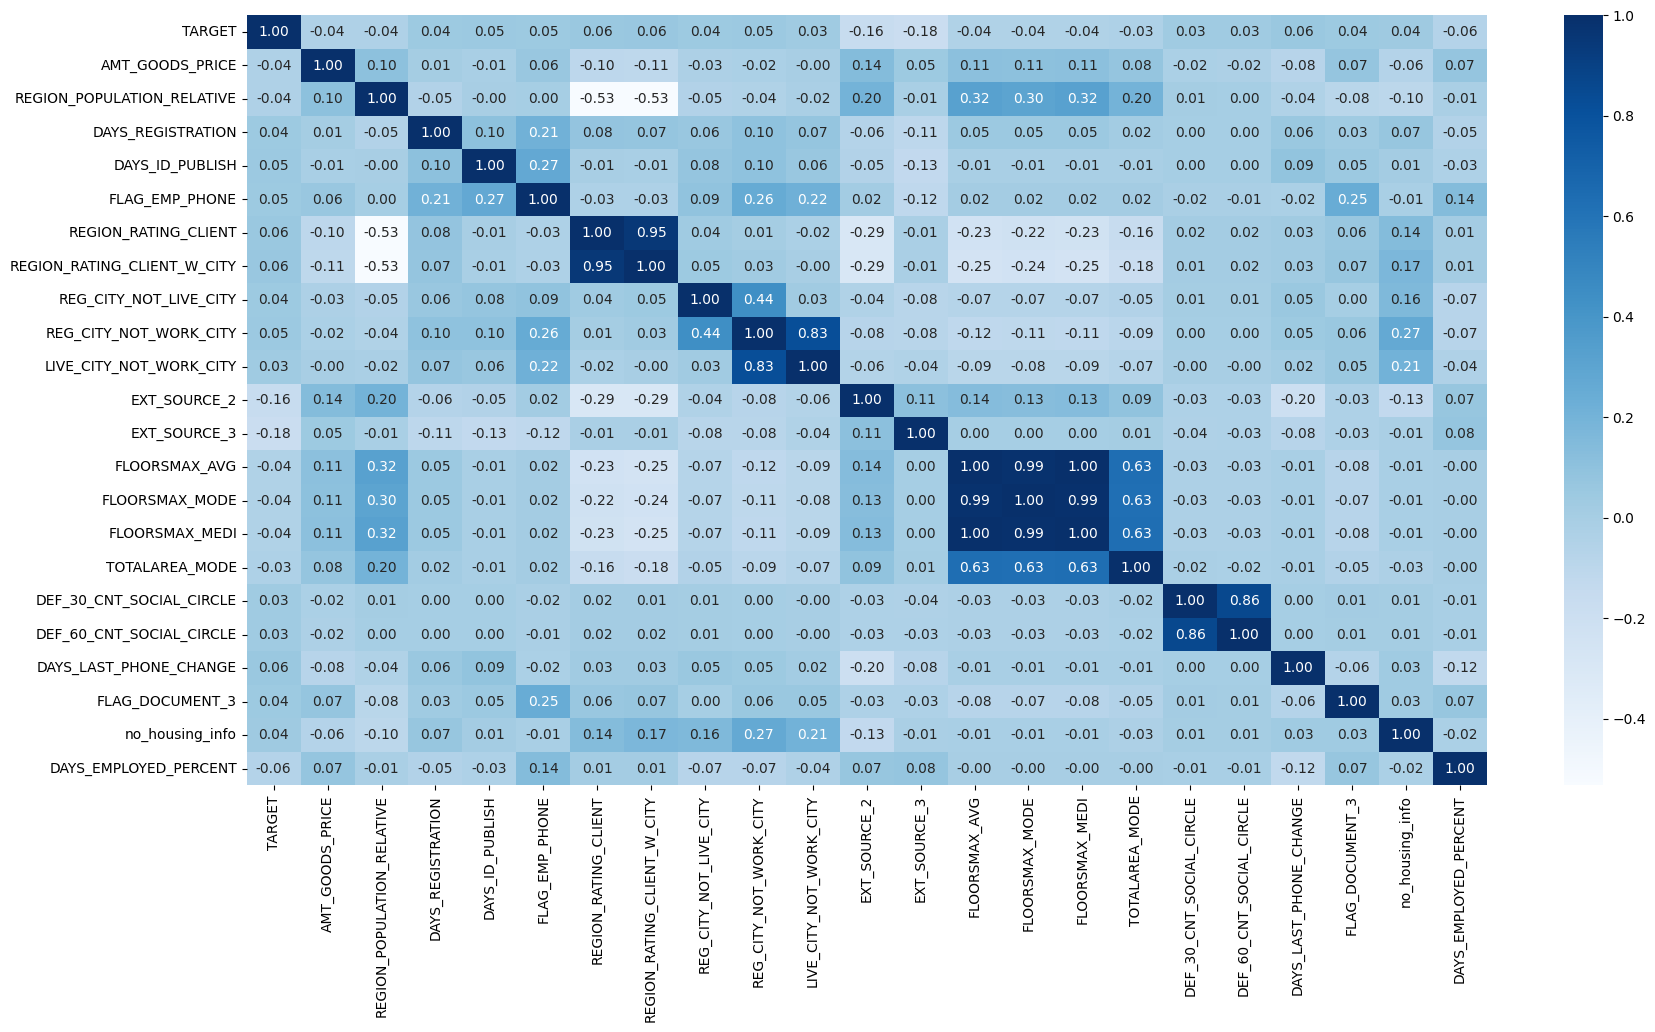

In [67]:
# most correlated features
corrmat = app_train_copy[numerical_col1].corr()
top_corr_features = corrmat.index[abs(corrmat["TARGET"])>=0.03]
plt.figure(figsize=(20,10))
g = sns.heatmap(app_train_copy[top_corr_features].corr(),annot=True,cmap='Blues', fmt='.2f')

In [68]:
# filter correlation pairs higher than 0.9

def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(app_train_copy[numerical_col1], 0.9)

REGION_RATING_CLIENT          REGION_RATING_CLIENT_W_CITY     0.950842
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_MEDI    0.963539
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.971893
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.985689
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.988237
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993825
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997034
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.997978
TARGET                        TARGET                               NaN
dtype: float64

In [69]:
# delete one of each highly correlated pairs - six features
app_train_copy.drop(['REGION_RATING_CLIENT_W_CITY','YEARS_BEGINEXPLUATATION_MODE','YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_MODE','FLOORSMAX_AVG','OBS_60_CNT_SOCIAL_CIRCLE'], axis=1, inplace=True)

In [70]:
app_train_model= app_train_copy.copy()
x = app_train_model.drop('TARGET' , axis =1)
y = app_train_model['TARGET']

In [71]:
# classify categorical and numerical
def classification(var):
    # for any categorical variable with 2 unique categories
    cat_1=var.select_dtypes(include='object').loc[:, var.nunique() <= 2].columns
    
    # for any categorical variable with more than 2 unique categories
    cat_2=var.select_dtypes(include='object').loc[:, var.nunique() > 2].columns
    
    num = var.select_dtypes(exclude = 'O').columns
    
    return cat_1, cat_2, num

In [72]:
cat_1, cat_2, num = classification(x)

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42, stratify = y)

## Data Preprocessing
- Deal with missing values: Impute other missing values with median
- Scaling and encoding

In [74]:
# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Preprocessing for first categorical group
categorical_transformer_1 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('le', OrdinalEncoder())])

# Preprocessing for second categorical group
categorical_transformer_2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    [
     ('num', numerical_transformer, num),
     ('le', categorical_transformer_1, cat_1),
     ('oe', categorical_transformer_2, cat_2)
     ]
    )

In [75]:
# Data Preprocessing
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)

## Baseline Model

In [76]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [77]:
# LogisticRegression 
log_reg = LogisticRegression(solver='liblinear', random_state=1)
log_reg.fit(x_train_preprocessed,y_train)
print('Train:',"%.3f" % log_reg.score(x_train_preprocessed, y_train))
print('Test:',"%.3f" % log_reg.score(x_test_preprocessed, y_test))

Train: 0.919
Test: 0.919


In [78]:
# compute ROC AUC score
print('Train roc_auc_score:',"%.5f" % roc_auc_score(y_train, log_reg.predict_proba(x_train_preprocessed)[:, 1]))
print('Test roc_auc_score:',"%.5f" % roc_auc_score(y_test, log_reg.predict_proba(x_test_preprocessed)[:, 1]))

Train roc_auc_score: 0.74505
Test roc_auc_score: 0.74435


## SMOTE Minority Oversampling

In [79]:
app_train_model_smote= app_train_copy.copy()
x_smote = app_train_model_smote.drop('TARGET' , axis =1)
y_smote = app_train_model_smote['TARGET']

In [80]:
cat_1, cat_2, num = classification(x_smote)

In [81]:
x_smote_train, x_smote_test, y_smote_train, y_smote_test = train_test_split(x_smote, y_smote, test_size=0.33, random_state=42, stratify = y)

In [82]:
x_smote_train_preprocessed = preprocessor.fit_transform(x_smote_train)
x_smote_test_preprocessed = preprocessor.transform(x_smote_test)

In [83]:
x_smote_preprocessed = np.concatenate((x_smote_train_preprocessed, x_smote_test_preprocessed))

In [84]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=3)

new_x, new_y = smote.fit_resample(x_smote_preprocessed, y_smote)

In [85]:
new_y.value_counts()

TARGET
1    282686
0    282686
Name: count, dtype: int64

In [86]:
x_smote_train1, x_smote_test1, y_smote_train1, y_smote_test1 = train_test_split(new_x, new_y, test_size=0.33, random_state=42)

In [ ]:
# LogisticRegression 
log_reg_smote = LogisticRegression(solver='liblinear', random_state=1)
log_reg_smote.fit(x_smote_train1,y_smote_train1)
print('Train:',"%.3f" % log_reg_smote.score(x_smote_train1, y_smote_train1))
print('Test:',"%.3f" % log_reg_smote.score(x_smote_test1, y_smote_test1))

In [ ]:
print('Train roc_auc_score:',"%.5f" % roc_auc_score(y_smote_train1, log_reg_smote.predict_proba(x_smote_train1)[:, 1]))
print('Test roc_auc_score:',"%.5f" % roc_auc_score(y_smote_test1, log_reg_smote.predict_proba(x_smote_test1)[:, 1]))

## Hyperparameter Tuning of Decision Tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Tuning Decision Tree
dtree_params = {"min_samples_split" : range(10,100,20),\
                "max_depth": range(1,15,2),\
                "max_features": [0.2, 0.4, 0.6, 0.8, 1]}

In [ ]:
# Tuning Decision Tree
dt_rand = RandomizedSearchCV(DecisionTreeClassifier(random_state=50), dtree_params, cv=3, return_train_score=True)
dt_rand.fit(x_train_preprocessed, y_train)

# Best Parameters
print('Best Parameters: ', dt_rand.best_params_)
print('Best Score: ', dt_rand.best_score_)

# Checking the score
print('Training Score: ', dt_rand.score(x_train_preprocessed, y_train))
print('Testing Score: ', dt_rand.score(x_test_preprocessed, y_test))

## Confussion matrices

In [ ]:
models1 = [LogisticRegression(random_state = 1, solver='liblinear',C= 0.01),\
           DecisionTreeClassifier(random_state = 50,min_samples_split=90,max_features= 0.8, max_depth= 5)]

names1 = ["LogisticRegression", "DecisionTree"]

In [ ]:
from sklearn.metrics import classification_report

for name, model in zip(names1, models1):
    model.fit(x_train_preprocessed, y_train)
    y_pred = model.predict(x_test_preprocessed)
    print(name)
    print(classification_report(y_test, y_pred))
    print('Train roc_auc_score:',"%.5f" % roc_auc_score(y_train, model.predict_proba(x_train_preprocessed)[:, 1]))
    print('Test roc_auc_score:',"%.5f" % roc_auc_score(y_test, model.predict_proba(x_test_preprocessed)[:, 1]))
    print('='*50)

- need model with higher recall (how many of actual positive cases are predicted correctly)
- Decission tree gives better result than logistic classifier

## RandomForestClassifier

In [ ]:
classifier = Pipeline(steps=[('preprocessor', preprocessor),
                             ('random_forest', RandomForestClassifier(n_estimators = 100, random_state = 50, max_depth=5, max_features=0.8))])
classifier.fit(x_train, y_train)

In [ ]:
y_pred = classifier.predict(x_test)
print("RandomForest")
print(classification_report(y_test, y_pred))

In [ ]:
print('Train roc_auc_score:',"%.5f" % roc_auc_score(y_train, classifier.predict_proba(x_train)[:, 1]))
print('Test roc_auc_score:',"%.5f" % roc_auc_score(y_test, classifier.predict_proba(x_test)[:, 1]))

- Decission tree & random forest give same recall results but random forest gives higher roc_auc_score

In [ ]:
print('Train:',"%.3f" % classifier.score(x_train, y_train))
print('Test:',"%.3f" % classifier.score(x_test, y_test))

In [ ]:
new_cat_cols = classifier.named_steps['preprocessor'].transformers_[2][1].named_steps['onehot'].get_feature_names_out(cat_2)
all_cols = np.concatenate([num, cat_1, new_cat_cols ])

In [ ]:
# Table of Feature Importance
importance = classifier['random_forest'].feature_importances_.round(3)
list_of_features = list(zip(all_cols, importance))
features_imp = pd.DataFrame(list_of_features, columns=['Features', 'Importance']).sort_values('Importance', ascending=False)
features_imp=features_imp
features_imp

In [ ]:
features_imp.to_csv('features_imp.csv')

In [ ]:
# Plotting Feature Importance
features_imp1=features_imp.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x=features_imp1['Importance'], y=features_imp1['Features'], color="green")

## Saving

In [ ]:
# Preprocessor & Model Saving
import pickle
pickle.dump(classifier, open('classifier.pkl', 'wb'))

## Creating a requirements.txt file 

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/'):  
    for filename in filenames:  
        print(os.path.join(dirname, filename))

In [ ]:
!pip3 install pipreqsnb

In [ ]:
!pipreqsnb --savepath ./requirements.txt /kaggle/input/homecreditdefaultrisk/__notebook__.ipynb

In [ ]:
from IPython.display import FileLink 
FileLink(r'requirements.txt')